In [ ]:
# default_exp api

In [ ]:
#hide_input
from pivotpy.utils import nav_links 
nav_links(7)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
> [&nbsp;`▶` MainAPI●&nbsp;](https://massgh.github.io/pivotpy/MainAPI)  
> [&nbsp;`▶` SpinProjectedSurfaces&nbsp;](https://massgh.github.io/pivotpy/SpinProjectedSurfaces)  
> [&nbsp;`▶` Example&nbsp;](https://massgh.github.io/pivotpy/Example)  


# User API
Functions and Classes in this module are directly accessible from main import i.e. `import pivotpy as pp`. For most of work, this is sufficient unless you need very fine control on what todo. 

In [ ]:
#export
import os
import numpy as np
import plotly.graph_objects as go
try:
    from pivotpy import vr_parser as vp
    from pivotpy import splots as sp
    from pivotpy import iplots as ip
    from pivotpy import sio as sio
    from pivotpy import widgets as wdg
    from pivotpy import utils as gu
    from pivotpy import serializer
    from pivotpy import surfaces as srf
except:
    import pivotpy.vr_parser as vp
    import pivotpy.splots as sp
    import pivotpy.iplots as ip
    import pivotpy.sio as sio
    import pivotpy.widgets as wdg
    import pivotpy.utils as gu
    import pivotpy.serializer as serializer
    import pivotpy.surfaces as srf

def _sub_doc(from_func,skip_param=None,replace={}):
    """Assing __doc__ from other function. Replace words in docs where need."""
    def wrapper(func):
        docs = '\n'.join(line for line in from_func.__doc__.splitlines() if skip_param not in line)
        for k,v in replace.items():
            docs = docs.replace(k,v)
        func.__doc__ = docs
        return func
    return wrapper

In [ ]:
#hide_input
# To run notebook smoothly, not for module export
from nbdev.showdoc import show_doc
import types
def _doc_class_memebers(cls):
    """Show all class memebers' docs."""
    for name,func in cls.__dict__.items():
        if isinstance(func, (types.FunctionType,types.MethodType)) and name[0] != '_':
            show_doc(func)
def _doc_it(obj):
    """Show docs of object."""
    show_doc(obj)
    
__all__ =[] # This is to enable dynamic setting of variables, will come in module export automatically 


In [ ]:
#export
def download_structure(formula, mp_id=None, max_sites=None,min_sites=None, api_key=None,save_key = False):
    """Download structure data from Materials project website.
    - **Parameters**
        - formula: chemical formula of the material.
        - mp_id: Materials project id of material.
        - max_sites: maximum number of sites in structure to download.
        - min_sites: minimum number of sites in structure to download.
    > max_sites and min_sites are used to filter the number of sites in structure, or use mp_id to download a specific structure.
    - **One Time API Key**
        - api_key: API key from Materials project websit, if you use save_key=True, never required again.
        - save_key: Save API key to file. You can save any time of key or device changed.
    - **Return**
        List of Structure data containing attribute/method `cif`/`export_poscar, write_cif` etc.
    """
    mp = sio.InvokeMaterialsProject(api_key= api_key)
    output = mp.request(formula=formula,mp_id=mp_id,max_sites=max_sites,min_sites=min_sites) # make a request
    if save_key and isinstance(api_key,str):
        mp.save_api_key(api_key)
    if mp.success:
        return output
    else:
        raise ConnectionError('Connection was not sccessful. Try again!')

In [ ]:
#export 
# Direct function exports from modules
_memebers = (
    srf.SpinDataFrame,
    sio.get_kpath,
    sio.str2kpath,
    sio.fancy_quiver3d,
    sio.rotation,
    wdg.generate_summary,
    wdg.VasprunApp,
    wdg.KPathApp,
    gu.set_dir,
    gu.get_child_items,
    gu.transform_color,
    gu.interpolate_data,
    vp.split_vasprun,
    vp.xml2dict,
    ip.iplot2html,
    sp.plt2html,
    sp.plt2text,
    sp.show,
    sp.savefig,
    sp.append_axes,
    sp.join_axes
)

# Subset of functions from modules in __all__ to make exportable as *
__all__ = [*[_m.__name__ for _m in _memebers],*[a for a in __all__ if a != '__all__']]
for _m in _memebers:
    locals()[_m.__name__] = _m # Assign to local namespace that can be exported, classes only have __name__, not name

In [ ]:
#hide_input
for _m in _memebers:
    _doc_it(_m)
    if _m.__name__ == 'InvokeMaterialsProject':
        _ = [_doc_it(method) for method in [_m.request,_m.poscars,_m.cifs]]
    if _m.__name__ == 'VasprunApp':
        _ = [_doc_it(method) for method in [_m.show,_m.splot,_m.iplot,_m.set_theme_colors]]
    if _m.__name__ == 'KPathApp':
        _ = [_doc_it(method) for method in [_m.show,_m.splot,_m.iplot, _m.get_kpath]]
    if _m.__name__ == 'SpinDataFrame':
        _ = [_doc_it(method) for method in [_m.splot,_m.masked,_m.sliced, _m.wraps]]
        

<h2 id="SpinDataFrame" class="doc_header"><code>class</code> <code>SpinDataFrame</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/surfaces.py#L57" class="source_link" style="float:right">[source]</a></h2>

> <code>SpinDataFrame</code>(**`path`**=*`None`*, **`band`**=*`0`*, **`elements`**=*`[[0]]`*, **`orbs`**=*`[[0]]`*, **`scale_data`**=*`False`*, **`E_Fermi`**=*`None`*, **`skipk`**=*`None`*) :: `DataFrame`

Spin data from vasprun.xml is converted to a dataframe.
- **Parameters**:
    - path: path to `vasprun.xml` or auto picks in current directory.
    - band: band index to plot, only one band is supported.
    - elements: list of elements to plot. inner list contains ions indices.
    - orbs: list of orbitals to plot. inner list contains orbitals indices.
    - scale_data: if True, data is scaled to -1 to 1.
    - E_Fermi: if not None, auto picked as Fermi level from vasprun.xml.
    - skipk: if not None, auto skipped unnecessary k-points.

- **Returns**:
    - SpinDataFrame: dataframe with colums as k-points, eigenvalues, spin components projected over selected ions and orbtials.

- **Methods**:
    - wraps: wraps a pd.DataFrame in a SpinDataFrame, that enables extra methods.
    - sliced: Slice data in a plane orthogonal to given `column` at given `value`.
    - masked: Mask data over a constant value in a given column. Useful for plotting fermi level/surface.
    - splot: plot data in a 2D plot.

    All other methods are inherited from pd.DataFrame. If you apply some method, then use `wraps` to wrap the result in a SpinDataFrame.

<h4 id="SpinDataFrame.splot" class="doc_header"><code>SpinDataFrame.splot</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/surfaces.py#L167" class="source_link" style="float:right">[source]</a></h4>

> <code>SpinDataFrame.splot</code>(**\*`args`**, **`arrows`**=*`[]`*, **`every`**=*`4`*, **`marker`**=*`'H'`*, **`ax`**=*`None`*, **`quiver_kws`**=*`{}`*, **`scale`**=*`None`*, **\*\*`kwargs`**)

plot a 2D energy surface with/without arrows.
- **Parameters**:
    - *args: 3 or 4 names of columns, representing X,Y,Energy, and optionally, something to colorize data. if kwargs has color, that takes precedence.
    - arrows: 2 or 3 names of columns, representing U,V as arrows direstcion, and optionally, something to colorize data.
    - every: every nth point is plotted as arrow.
    - marker: marker to use for scatter, use s as another argument to change size.
    - ax: matplotlib axes to plot on (defaults to auto create one).
    - quiver_kws: these are passed to matplotlib.pyplot.quiver.
    - scale: scale factor for if kpoints in cartesian mode. This should be closer to `2π/a`, where `a` is on second line of POSCAR.
**kwargs are passed to matplotlib.pyplot.scatter.

- **Returns**:
    - ax: matplotlib axes. It has additinal method `colorbar` to plot colorbar from most recent plot.

See examples at https://massgh.github.io/pivotpy/

<h4 id="SpinDataFrame.masked" class="doc_header"><code>SpinDataFrame.masked</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/surfaces.py#L112" class="source_link" style="float:right">[source]</a></h4>

> <code>SpinDataFrame.masked</code>(**`column`**, **`value`**, **`tol`**=*`0.01`*, **`n`**=*`None`*, **`method`**=*`'cubic'`*)

Mask dataframe with a given value, using a tolerance.
If n is given, data values are interpolated to grid of size (l,m,n) where n is longest side.
n could be arbirarily large as mask will filter out data outside the tolerance.

<h4 id="SpinDataFrame.sliced" class="doc_header"><code>SpinDataFrame.sliced</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/surfaces.py#L163" class="source_link" style="float:right">[source]</a></h4>

> <code>SpinDataFrame.sliced</code>(**`column`**=*`'kz'`*, **`value`**=*`0`*)

Slice data in a plane orthogonal to given `column` at given `value`

<h4 id="SpinDataFrame.wraps" class="doc_header"><code>SpinDataFrame.wraps</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/surfaces.py#L96" class="source_link" style="float:right">[source]</a></h4>

> <code>SpinDataFrame.wraps</code>(**`dataframe`**)

wraps a pd.DataFrame in a SpinDataFrame, that enables extra methods

<h4 id="get_kpath" class="doc_header"><code>get_kpath</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/sio.py#L349" class="source_link" style="float:right">[source]</a></h4>

> <code>get_kpath</code>(**`hsk_list`**=*`[]`*, **`labels`**=*`[]`*, **`n`**=*`5`*, **`weight`**=*`None`*, **`ibzkpt`**=*`None`*, **`outfile`**=*`None`*)

Generate list of kpoints along high symmetry path. Options are write to file or return KPOINTS list.
It generates uniformly spaced point with input `n` as just a scale factor of number of points per unit length.
You can also specify custom number of kpoints in an interval by putting number of kpoints as 4th entry in left kpoint.
- **Parameters**
    - hsk_list : N x 3 list of N high symmetry points, if broken path then [[N x 3],[M x 3],...].
                Optionally you can put a 4 values point where 4th entry will decide number of kpoints in current interval.
                Make sure that points in a connected path patch are at least two i.e. `[[x1,y1,z1],[x2,y2,z2]]` or `[[x1,y1,z1,N],[x2,y2,z2]]`.
    - n        : int, number per unit length, this makes uniform steps based on distance between points.
    - weight : Float, if None, auto generates weights.
    - ibzkpt : Path to ibzkpt file, required for HSE calculations.
    - labels : Hight symmetry points labels. Good for keeping record of lables and points indices for later use.
                > Note: If you do not want to label a point, label it as 'skip' at its index and it will be removed.
    - outfile: Path/to/file to write kpoints.

If `outfile = None`, KPONITS file content is printed.

<h4 id="str2kpath" class="doc_header"><code>str2kpath</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/sio.py#L448" class="source_link" style="float:right">[source]</a></h4>

> <code>str2kpath</code>(**`kpath_str`**, **`n`**=*`5`*, **`weight`**=*`None`*, **`ibzkpt`**=*`None`*, **`outfile`**=*`None`*)

Get Kpath from a string of kpoints (Line-Mode like). Useful in Terminal.
- **Parameters**
    - kpath_str: str, a multiline string similiar to line mode of KPOINTS, initial 4 lines are not required.
        - If you do not want to label a point, label it as 'skip' and it will be removed.
        - You can add an interger at end of a line to customize number of points in a given patch.
        - Each empty line breaks the path, so similar points before and after empty line are useless here.
    - n      : int, number per unit length, this makes uniform steps based on distance between points.
    - weight : Float, if None, auto generates weights.
    - ibzkpt : Path to ibzkpt file, required for HSE calculations.
    - outfile: Path/to/file to write kpoints.

- **Example**
    > str2kpath('''0 0 0 !$\Gamma$ 3
                0.25 0.25 0.25 !L''')
    > Automatically generated using PivotPy with HSK-INDS = [0, -1], LABELS = ['$\Gamma$', 'L'], SEG-INDS = []
        >   3
    > Reciprocal Lattice
    >   0.0000000000    0.0000000000    0.0000000000    0.333333
    >   0.1250000000    0.1250000000    0.1250000000    0.333333
    >   0.2500000000    0.2500000000    0.2500000000    0.333333

<h4 id="fancy_quiver3d" class="doc_header"><code>fancy_quiver3d</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/sio.py#L52" class="source_link" style="float:right">[source]</a></h4>

> <code>fancy_quiver3d</code>(**`X`**, **`Y`**, **`Z`**, **`U`**, **`V`**, **`W`**, **`ax`**=*`None`*, **`C`**=*`'r'`*, **`L`**=*`0.7`*, **`mutation_scale`**=*`10`*, **\*\*`kwargs`**)

Plots 3D arrows on a given ax. See [FancyArrowPatch](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.FancyArrowPatch.html).
- **Parameters**
    - X, Y, Z : 1D arrays of coordinates of arrows' tail point.
    - U, V, W : 1D arrays of dx,dy,dz of arrows.
    - ax: 3D axes, if not given, auto created.
    - C : 1D colors array mapping for arrows. Could be one color.
    - L : 1D linwidths array mapping for arrows. Could be one linewidth.
    - mutation_scale: Arrow head width/size scale. Default is 10.
    - kwargs: FancyArrowPatch's keyword arguments excluding positions,color, lw and mutation_scale, shrinkA, shrinkB which are already used. An important keyword argument is `arrowstyle` which could be '->','-|>', their inverted forms and many more. See on matplotlib.

<h4 id="rotation" class="doc_header"><code>rotation</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/sio.py#L716" class="source_link" style="float:right">[source]</a></h4>

> <code>rotation</code>(**`angle_deg`**, **`axis_vec`**)

Get a scipy Rotation object at given `angle_deg` around `axis_vec`.
Usage:
    rot = rotation(60,[0,0,1])
    rot.apply([1,1,1])
    [-0.3660254  1.3660254  1.] #give this

<h4 id="generate_summary" class="doc_header"><code>generate_summary</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L485" class="source_link" style="float:right">[source]</a></h4>

> <code>generate_summary</code>(**`paths_list`**=*`None`*)



<h2 id="VasprunApp" class="doc_header"><code>class</code> <code>VasprunApp</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L531" class="source_link" style="float:right">[source]</a></h2>

> <code>VasprunApp</code>(**`height`**=*`580`*)

Display a GUI for vasp output analysis. `self.theme_colors` can be used to edit custom theme.
- **Usage Example**

```python
import pivotpy as pp
va = pp.VasprunApp()
va.cache_data = False #Turn off cache globally.
va.evr_kws['elim'] = [-2,2] #Only Bands in this range will be included. Global accross project, can change anytime.
va.evr_kws['try_pwsh'] = False #Defult is True. Tries to load Powershell exported data.
va.ibands_kws['mode'] = 'bands' #Change graph mode from 'markers' to 'bands'. Setting it to 'lines' is not recommended in live graph, it could hang all UI.
va.show() #Displays App and do work!
va.theme_colors = pp.dark_colors #Set theme to dark externally and edit dictionary values to make your own theme
va.splot(**kwargs) #Get matplotlib plot of current data.
va.df #After you do some analysis and hit `Project Summary` button, get DataFrame.
va.fig #Get current fig in Notebook cell.
```

<h4 id="VasprunApp.show" class="doc_header"><code>VasprunApp.show</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L752" class="source_link" style="float:right">[source]</a></h4>

> <code>VasprunApp.show</code>()



<h4 id="VasprunApp.splot" class="doc_header"><code>VasprunApp.splot</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L1012" class="source_link" style="float:right">[source]</a></h4>

> <code>VasprunApp.splot</code>(**\*\*`kwargs`**)

Returns matplotlib Axes.`kwargs` are passed to [`splot_rgb_lines`](/pivotpy/StaticPlots.html#splot_rgb_lines) or [`splot_dos_lines`](/pivotpy/StaticPlots.html#splot_dos_lines) based on current figure. `kwargs` should exclude whatever inside `self.input` and `path_evr`

<h4 id="VasprunApp.iplot" class="doc_header"><code>VasprunApp.iplot</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L1004" class="source_link" style="float:right">[source]</a></h4>

> <code>VasprunApp.iplot</code>(**\*\*`kwargs`**)

Returns a detached interactive Figure. `kwargs` are passed to [`iplot_rgb_lines`](/pivotpy/InteractivePlots.html#iplot_rgb_lines) or [`iplot_dos_lines`](/pivotpy/InteractivePlots.html#iplot_dos_lines) based on current figure. `kwargs` should exclude whatever inside `self.input` and `path_evr`

<h4 id="VasprunApp.set_theme_colors" class="doc_header"><code>VasprunApp.set_theme_colors</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L643" class="source_link" style="float:right">[source]</a></h4>

> <code>VasprunApp.set_theme_colors</code>(**`theme_colors`**)

Get self.theme_colors and after edit set back

<h2 id="KPathApp" class="doc_header"><code>class</code> <code>KPathApp</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L1021" class="source_link" style="float:right">[source]</a></h2>

> <code>KPathApp</code>(**`path`**=*`'POSCAR'`*)

View and trace path on BZ.
- **Usage**
    > ka = KPathApp()
    > ka.show() #Display app
    > ka.splot() #get matplotlib figure

<h4 id="KPathApp.show" class="doc_header"><code>KPathApp.show</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L1132" class="source_link" style="float:right">[source]</a></h4>

> <code>KPathApp.show</code>()



<h4 id="KPathApp.splot" class="doc_header"><code>KPathApp.splot</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L1286" class="source_link" style="float:right">[source]</a></h4>

> <code>KPathApp.splot</code>(**\*\*`kwargs`**)

Same as `pp.splot_bz` except it also plots path on BZ. `kwargs` are passed to `pp.splot_bz`

<h4 id="KPathApp.iplot" class="doc_header"><code>KPathApp.iplot</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L1300" class="source_link" style="float:right">[source]</a></h4>

> <code>KPathApp.iplot</code>()

Returns disconnected current plotly figure

<h4 id="KPathApp.get_kpath" class="doc_header"><code>KPathApp.get_kpath</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L1280" class="source_link" style="float:right">[source]</a></h4>

> <code>KPathApp.get_kpath</code>(**`n`**=*`5`*, **`weight`**=*`None`*, **`ibzkpt`**=*`None`*, **`outfile`**=*`None`*)

See Docs of pp.str2kpath for details.

<h4 id="set_dir" class="doc_header"><code>set_dir</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/utils.py#L45" class="source_link" style="float:right">[source]</a></h4>

> <code>set_dir</code>(**`path`**)

work in some directory and come back

<h4 id="get_child_items" class="doc_header"><code>get_child_items</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/utils.py#L133" class="source_link" style="float:right">[source]</a></h4>

> <code>get_child_items</code>(**`path`**=*`'E:\\Research\\pivotpy'`*, **`depth`**=*`None`*, **`recursive`**=*`True`*, **`include`**=*`None`*, **`exclude`**=*`None`*, **`filesOnly`**=*`False`*, **`dirsOnly`**=*`False`*)

- Returns selected directories/files recursively from a parent directory.
- **Parameters**
    - path    : path to a parent directory, default is `"."`
    - depth   : int, subdirectories depth to get recursively, default is None to list all down.
    - recursive : If False, only list current directory items, if True,list all items recursively down the file system.
    - include: Default is None and includes everything. String of patterns separated by | to keep, could be a regular expression.
    - exclude: Default is None and removes nothing. String of patterns separated by | to drop,could be a regular expression.
    - filesOnly : Boolean, if True, returns only files.
    - dirsOnly  : Boolean, if True, returns only directories.
- **Returns**
    - GLOB : Tuple (children,parent), children is list of selected directories/files and parent is given path. Access by index of by `get_child_items().{children,path}`.

<h4 id="transform_color" class="doc_header"><code>transform_color</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/utils.py#L370" class="source_link" style="float:right">[source]</a></h4>

> <code>transform_color</code>(**`arr`**, **`s`**=*`1`*, **`c`**=*`1`*, **`b`**=*`0`*, **`mixing_matrix`**=*`None`*)

- Color transformation such as brightness, contrast, saturation and mixing of an input color array. `c = -1` would invert color,keeping everything else same.
- **Parameters**
    - arr: input array, a single RGB/RGBA color or an array with inner most dimension equal to 3 or 4. e.g. [[[0,1,0,1],[0,0,1,1]]].
    - c  : contrast, default is 1. Can be a float in [-1,1].
    - s  : saturation, default is 1. Can be a float in [-1,1]. If s = 0, you get a gray scale image.
    - b  : brightness, default is 0. Can be a float in [-1,1] or list of three brightnesses for RGB components.
    - mixing_matrix: A 3x3 matrix to mix RGB values, such as `pp.color_matrix`.

[Recoloring](https://docs.microsoft.com/en-us/windows/win32/gdiplus/-gdiplus-recoloring-use?redirectedfrom=MSDN)
[Rainmeter](https://docs.rainmeter.net/tips/colormatrix-guide/)

<h4 id="interpolate_data" class="doc_header"><code>interpolate_data</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/utils.py#L57" class="source_link" style="float:right">[source]</a></h4>

> <code>interpolate_data</code>(**`x`**, **`y`**, **`n`**=*`10`*, **`k`**=*`3`*)

- Returns interpolated xnew,ynew. If two points are same, it will add 0.1*min(dx>0) to compensate it.
- **Parameters**
    - x: 1D array of size p,
    - y: ndarray of size p*q*r,....
    - n: Number of points to add between two given points.
    - k: Polynomial order to interpolate.

- Only axis 0 will be interpolated. If you want general interploation, use `from scipy.interpolate import make_interp_spline, BSpline`

- **General Usage**: K(p),E(p,q) input from bandstructure.
    - `Knew,Enew= interpolate_data(K,E,n=10,k=3)`. cubic interploation

<h4 id="split_vasprun" class="doc_header"><code>split_vasprun</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/vr_parser.py#L888" class="source_link" style="float:right">[source]</a></h4>

> <code>split_vasprun</code>(**`path`**=*`None`*)

- Splits a given vasprun.xml file into a smaller _vasprun.xml file plus _set[1,2,3,4].txt files which contain projected data for each spin set.
- **Parameters**
    - path: path/to/vasprun.xml file.
- **Output**
    - _vasprun.xml file with projected data.
    - _set1.txt for projected data of colinear calculation.
    - _set1.txt for spin up data and _set2.txt for spin-polarized case.
    - _set[1,2,3,4].txt for each spin set of non-colinear calculations.

<h4 id="xml2dict" class="doc_header"><code>xml2dict</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/vr_parser.py#L74" class="source_link" style="float:right">[source]</a></h4>

> <code>xml2dict</code>(**`xmlnode_or_filepath`**)

Convert xml node or xml file content to dictionary. All output text is in string format, so further processing is required to convert into data types/split etc.
- The only paramenter `xmlnode_or_filepath` is either a path to an xml file or an `xml.etree.ElementTree.Element` object.
- Each node has `tag,text,attr,nodes` attributes. Every text element can be accessed via
`xml2dict()['nodes'][index]['nodes'][index]...` tree which makes it simple.

<h4 id="iplot2html" class="doc_header"><code>iplot2html</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/iplots.py#L173" class="source_link" style="float:right">[source]</a></h4>

> <code>iplot2html</code>(**`fig`**, **`filename`**=*`None`*, **`out_string`**=*`False`*, **`modebar`**=*`True`*)

- Writes plotly's figure as HTML file or display in IPython which is accessible when online. It is different than plotly's `fig.to_html` as it is minimal in memory. If you need to have offline working file, just use `fig.write_html('file.html')` which will be larger in size.
- **Parameters**
    - fig      : A plotly's figure object.
    - filename : Name of file to save fig. Defualt is None and show plot in Colab/Online or return hrml string.
    - out_string: If True, returns HTML string, if False displays graph if possible.

<h4 id="plt2html" class="doc_header"><code>plt2html</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/splots.py#L1339" class="source_link" style="float:right">[source]</a></h4>

> <code>plt2html</code>(**`plt_fig`**=*`None`*, **`transparent`**=*`True`*, **`dash_html`**=*`None`*)

- Returns base64 encoded Image to display in notebook or HTML <svg> or plotly's dash_html_components.Img object.
- **Parameters**
    - plt_fig    : Matplotlib's figure instance, auto picks as well.
    - transparent: True of False for fig background.
    - dash_html  : Default is None which results in an image display in jupyter notebook.
        - If True, returns html.Img object for plotly's dash.
        - If False, returns <svg> object to embed in HTML DOM.

<h4 id="plt2text" class="doc_header"><code>plt2text</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/splots.py#L1395" class="source_link" style="float:right">[source]</a></h4>

> <code>plt2text</code>(**`plt_fig`**=*`None`*, **`width`**=*`144`*, **`vscale`**=*`0.96`*, **`colorful`**=*`True`*, **`invert`**=*`False`*, **`crop`**=*`False`*, **`outfile`**=*`None`*)

Displays matplotlib figure in terminal as text. You should use a monospcae font like `Cascadia Code PL` to display image correctly. Use before plt.show().
- **Parameters**
    - plt_fig: Matplotlib's figure instance. Auto picks if not given.
    - width  : Character width in terminal, default is 144. Decrease font size when width increased.
    - vscale : Useful to tweek aspect ratio. Default is 0.96 and prints actual aspect in `Cascadia Code PL`. It is approximately `2*width/height` when you select a single space in terminal.
    - colorful: Default is False, prints colored picture if terminal supports it, e.g Windows Terminal.
    - invert  : Defult is False, could be useful for grayscale image.
    - crop    : Default is False. Crops extra background, can change image color if top left pixel is not in background, in that case set this to False.
    - outfile: If None, prints to screen. Writes on a file.

<h4 id="show" class="doc_header"><code>show</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/splots.py#L1373" class="source_link" style="float:right">[source]</a></h4>

> <code>show</code>(**`transparent`**=*`False`*)

Displays all available figures in browser without blocking terminal

<h4 id="savefig" class="doc_header"><code>savefig</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/splots.py#L1389" class="source_link" style="float:right">[source]</a></h4>

> <code>savefig</code>(**`filename`**, **`dpi`**=*`600`*, **\*\*`kwargs`**)

Save matplotlib's figure while handling existing files. `kwargs` are passed to `plt.savefig`

<h4 id="append_axes" class="doc_header"><code>append_axes</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/splots.py#L169" class="source_link" style="float:right">[source]</a></h4>

> <code>append_axes</code>(**`ax`**, **`position`**=*`'right'`*, **`size`**=*`0.2`*, **`pad`**=*`0.1`*, **`sharex`**=*`False`*, **`sharey`**=*`False`*, **\*\*`kwargs`**)

Append an axes to the given `ax` at given `position` |top|right|left|bottom|. Useful for adding custom colorbar.
kwargs are passed to `mpl_toolkits.axes_grid1.make_axes_locatable.append_axes`.
Returns appended axes.

<h4 id="join_axes" class="doc_header"><code>join_axes</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/splots.py#L185" class="source_link" style="float:right">[source]</a></h4>

> <code>join_axes</code>(**`ax1`**, **`ax2`**, **\*\*`kwargs`**)

Join two axes together. Useful for adding custom colorbar on a long left axes of whole figure.
Apply tight_layout() before calling this function.
kwargs are passed to `fig.add_axes`.

In [ ]:
#export
def parse_text(path,
          dtype=float, delimiter='\s+',
          include=None, exclude='#',
          raw=False, fix_format=True,
          start=0, nlines=None, count=-1,
          new_shape=None,cols=None,
          old_shape=None, slice_rows=None #Works if both given
          ):
    """
    - Reads a sliced array from txt,csv type files and return to array.
        Also manages if columns lengths are not equal and return 1D array.
        It is faster than loading  whole file into memory. This single function could be used
        to parse EIGENVAL, PROCAR, DOCAR and similar files with just a
        combination of `exclude, include,start,stop,step` arguments.
    - **Parameters**
        - path: Path/to/file to be parsed.
        - dtype: float by default. Data type of output array, it is must have argument.
        - start,nlines: The indices of lines to start reading from and number of lines after start respectively.
            Both could be None or int, while start could be a list to read slices from file provided that nlines is int.
            The spacing between adjacent indices in start should be equal to or greater than nlines as pointer in file
            do not go back on its own.  These parameters are not required if `slice_rows` and `old_shape` are given.
            > Note: `start` should count comments if `exclude` is None.
        - count: `np.size(output_array) = nrows x ncols`, if it is known before execution, performance is increased.
        - delimiter:  Default is `\s+`. Could be any kind of delimiter valid in numpy and in the file.
        - cols: List of indices of columns to pick. Useful when reading a file like PROCAR which e.g. has text and numbers inline. This parameter is in output of `slice_data`.
        - include: Default is None and includes everything. String of patterns separated by | to keep, could be a regular expression.
        - exclude: Default is '#' to remove comments. String of patterns separated by | to drop,could be a regular expression.
        - raw    : Default is False, if True, returns list of raw strings. Useful to select `cols`.
        - fix_format: Default is True, it sepearates numbers with poor formatting like 1.000-2.000 to 1.000 2.000 which is useful in PROCAR. Keep it False if want to read string literally.
        - new_shape : Tuple of shape Default is None. Will try to reshape in this shape, if fails fallbacks to 2D or 1D. Not required if `slice_rows` and `old_shape` are given.
        - old_shape: It is required when you need to pick blocks of data from rows.
                columns should be last entry, like (2,2,3) means 3 columns and two different indexed blocks are there.
                Only works if `slice_rows` is given too.
        - slice_rows: It is required when you need to pick blocks of data from rows.
                [(0,1),(0,1)] will pick lines at index 0,1,3,4 if first dimension has size 3. It is like N1*i+j for N1=3.
                General formula to pick rows is `inner_block_index + inner_block_size*second_block_index + inner_most_size*second_block_size*third_block_index + ...`
                `i_1 + N_1*i_2 + N_1*N_2*i_3 + ...` where i_1 is inner most index.
                Only works if `old_shape` is given too.
    - **Examples**
        > `parse_text('path/to/PROCAR',start=3,include='k-point',cols=[3,4,5])[:2]`
        > array([[ 0.125,  0.125,  0.125],
        >        [ 0.375,  0.125,  0.125]])
        > `parse_text('path/to/EIGENVAL',start=7,exclude='E',cols=[1,2])[:2]`
        > array([[-11.476913,   1.      ],
        >        [  0.283532,   1.      ]])
    > Note: Slicing a dimension to 100% of its data is faster than let say 80% for inner dimensions, so if you have to slice more than 50% of an inner dimension, then just load full data and slice after it.

    """
    if not os.path.isfile(path):
        raise FileNotFoundError(f"File {path!r} does not exists")

    extra_kws = dict(dtype=dtype,delimiter=delimiter, # Data related
                     include=include, exclude= exclude, # selection related
                     raw=raw, fix_format= fix_format,new_shape=new_shape, # Output related
                     start=start,nlines=nlines,count=count,cols=cols # slicing related
                     )
    if old_shape and slice_rows:
        _cols = -1 if cols == None else cols
        extra_kws.update(vp.slice_data(dim_inds=[*slice_rows,_cols],old_shape=old_shape))
        print(extra_kws)

    return vp.islice2array(path_or_islice=path,**extra_kws)

In [ ]:
print(parse_text('POSCAR',raw=True))
parse_text('POSCAR',start=8,cols=[0,1,2])

2.46803100000000
1.0000000000000000    0.0000000000000000    0.0000000000000000
-0.4999997974093519    0.8660251836382931    0.0000000000000000
0.0000000000000000    0.0000000000000000    8.1029342824300024
C
2
Selective Dynamics
Direct
0.3333330000000000   0.6666670000000000   0.0000000000000000   T T T
0.6666670000000000   0.3333330000000000   0.0000000000000000   F F F


array([[0.333333, 0.666667, 0.      ],
       [0.666667, 0.333333, 0.      ]])

In [ ]:
#export
from contextlib import suppress
class POSCAR:
    "POSACR class to contain data and related methods, data is PoscarData, json/tuple file/string."
    def __init__(self,path = None,text_plain = None,data = None):
        """Do not use `data` yourself, it's for operations on poscar.
        Prefrence order: data, text_plain, path"""
        self.path = path
        self.text_plain = text_plain
        self._kpts_info = None # Get defualt kpts_info
        if data:
            self._data = serializer.PoscarData.validated(data, keys=['basis','rec_basis','SYSTEM','cartesian'])
        else:
            self._data = sio.export_poscar(path=path,text_plain=text_plain)
            with suppress(BaseException): # Only reuqired here,not in vasprun_data or spin_data
                base_dir = os.path.split(os.path.abspath(path or './POSCAR'))[0]
                self._kpts_info = vp.get_kpoints_info(os.path.join(base_dir,'KPOINTS'))
        # These after data to work with data
        self.primitive = False
        self._bz = self.get_bz(primitive = False) # Get defualt regular BZ from sio
        self._cell = self.get_cell() # Get defualt cell
        self._plane = None # Get defualt plane, changed with splot_bz
        self._ax = None # Get defualt axis, changed with splot_bz

    def get_kpoints_info(self, other_path):
        "Return kpoints info from other_path to be POSCAR path, required for kpoints to bring in bz."
        self._kpts_info = vp.get_kpoints_info(other_path)
        return self._kpts_info

    @property
    def data(self):
        "Data object in POSCAR."
        return self._data

    @property
    def bz(self):
        return self._bz
    
    @property
    def cell(self):
        return self._cell

    @_sub_doc(sio.get_bz,'- path_pos')
    def get_bz(self, loop=True, digits=8, primitive=False):
        self._bz = sio.get_bz(path_pos = self._data.basis, loop=loop, digits=digits, primitive=primitive)
        self.primitive = primitive
        return self._bz

    def set_bz(self,primitive=False,loop=True,digits=8):
        """Set BZ in primitive or regular shape. returns None, just set self.bz"""
        self.get_bz(primitive=primitive,loop=loop,digits=digits)

    def get_cell(self, loop=True, digits=8):
        "See docs of `get_bz`, same except space is inverted."
        self._cell = sio.get_bz(path_pos=self._data.rec_basis,loop=loop, digits=digits, primitive=True) # cell must be primitive
        return self._cell

    @_sub_doc(sio.splot_bz,'- path_pos_bz')
    def splot_bz(self, ax=None, plane=None, color='blue', fill=True, vectors=True, v3=False, vname='b', colormap='plasma', light_from=(1, 1, 1), alpha=0.4):
        self._plane = plane # Set plane for splot_kpath
        new_ax = sio.splot_bz(path_pos_bz = self._bz, ax=ax, plane=plane, color=color, fill=fill, vectors=vectors, v3=v3, vname=vname, colormap=colormap, light_from=light_from, alpha=alpha)
        self._ax = new_ax # Set ax for splot_kpath
        return new_ax

    def splot_kpath(self,vertex = 0, knn_inds = None, labels = None, color='k', line_width = 0.8,marker_size = 10,marker_style = '.',**labels_kwargs):
        """Plot k-path over existing BZ.
        - **Parameters**
            - vertex: vertex index nearby which to plot path. There are as many vertices as there are in BZ's shape.
            - knn_inds: list of indices of k nearest points e.g. [2,3,1] will trace path linking as 2-3-1.
                0 is Gamma point and 1 is the selected vertex itself. Points are taken internally from BZ, you can see from `self.bz.specials`.
            - labels: list of labels for each k-point in same order as `knn_inds`.
            - color, line_width, marker_size, marker_style are passed to `plt.plot`.

        labels_kwargs are passed to `plt.text`.

        > Tip: You can use this function multiple times to plot multiple/broken paths over same BZ.
        """
        if not self._bz or not self._ax:
            raise ValueError("BZ not found, use `splot_bz` first")

        _specials = self._bz.specials
        nearest = knn_inds

        ijk = [0,1,2]
        _mapping = {'xy':[0,1],'xz':[0,2],'yz':[1,2],'zx':[2,0],'zy':[2,1],'yx':[1,0]}
        if isinstance(self._plane, str) and self._plane in _mapping:
            ijk = _mapping[self._plane]

        inds = _specials.near[vertex]
        if nearest:
            inds = [inds[n] for n in nearest]

        if not labels:
            labels = ["[{0:6.3f}, {1:6.3f}, {2:6.3f}]".format(*_specials.kpoints[i]) for i in inds]
            if nearest:
                labels = [f"{n}: {_lab}" for n, _lab in zip(nearest, labels)]

        coords = _specials.coords[inds][:,ijk]
        self._ax.plot(*coords.T,color = color,linewidth=line_width,marker=marker_style,markersize=marker_size)

        for c,text in zip(coords, labels):
            self._ax.text(*c,text,**labels_kwargs)
        return self._ax


    def splot_cell(self, ax=None, plane=None, color='blue', fill=True, vectors=True, v3=False, vname='a', colormap='plasma', light_from=(1, 1, 1), alpha=0.4):
        "See docs of `splot_bz`, everything is same except space is inverted."
        return sio.splot_bz(path_pos_bz = self._cell, ax=ax, plane=plane, color=color, fill=fill, vectors=vectors, v3=v3, vname=vname, colormap=colormap, light_from=light_from, alpha=alpha)

    @_sub_doc(sio.iplot_bz,'- path_pos_bz')
    def iplot_bz(self, fill=True, color='rgba(168,204,216,0.4)', background='rgb(255,255,255)', vname='b', alpha=0.4, ortho3d=True, fig=None):
        return sio.iplot_bz(path_pos_bz = self._bz, fill=fill, color=color, background=background, vname=vname, alpha=alpha, ortho3d=ortho3d, fig=fig)

    def iplot_cell(self, fill=True, color='rgba(168,204,216,0.4)', background='rgb(255,255,255)', vname='a', alpha=0.4, ortho3d=True, fig=None):
        "See docs of `iplot_bz`, everything is same except space is iverted."
        return sio.iplot_bz(path_pos_bz = self._cell, fill=fill, color=color, background=background, vname=vname, alpha=alpha, ortho3d=ortho3d, fig=fig)

    @_sub_doc(sio.splot_lat,'- poscar')
    def splot_lat(self, sizes=50, colors=[], colormap=None, bond_length=None, tol=0.1, eps=0.01, eqv_sites=True, translate=None, line_width=1, edge_color=(1, 0.5, 0, 0.4), vectors=True, v3=False, plane=None, light_from=(1, 1, 1), fill=False, alpha=0.4, ax=None):
        return sio.splot_lat(poscar=self._data, sizes=sizes, colors=colors, colormap=colormap, bond_length=bond_length, tol=tol, eps=eps, eqv_sites=eqv_sites, translate=translate, line_width=line_width, edge_color=edge_color, vectors=vectors, v3=v3, plane=plane, light_from=light_from, fill=fill, alpha=alpha, ax=ax)

    @_sub_doc(sio.iplot_lat,'- poscar')
    def iplot_lat(self, sizes=10, colors='blue', bond_length=None, tol=0.1, eps=0.01, eqv_sites=True, translate=None, line_width=4, edge_color='black', fill=False, alpha=0.4, ortho3d=True, fig=None):
        return sio.iplot_lat(poscar=self._data, sizes=sizes, colors=colors, bond_length=bond_length, tol=tol, eps=eps, eqv_sites=eqv_sites, translate=translate, line_width=line_width, edge_color=edge_color, fill=fill, alpha=alpha, ortho3d=ortho3d, fig=fig)

    @_sub_doc(sio.write_poscar,'- poscar')
    def write(self, sd_list=None, outfile=None, overwrite=False):
        return sio.write_poscar(poscar = self._data, sd_list=sd_list, outfile=outfile, overwrite=overwrite)

    @_sub_doc(sio.join_poscars,'- poscar1',replace={'poscar2':'other'})
    def join(self,other, direction='z', tol=0.01):
        return self.__class__(data = sio.join_poscars(poscar1=self._data, poscar2=other.data, direction=direction, tol=tol))

    @_sub_doc(sio.scale_poscar,'- path_poscar')
    def scale(self, scale=(1, 1, 1), tol=0.01):
        return self.__class__(data = sio.scale_poscar(path_poscar=self._data, scale=scale, tol=tol))

    @_sub_doc(sio.rotate_poscar,'- path_poscar')
    def rotate(self,angle_deg,axis_vec):
        return self.__class__(data = sio.rotate_poscar(path_poscar=self._data, angle_deg = angle_deg, axis_vec=axis_vec))

    @_sub_doc(sio.fix_sites,'- poscar')
    def fix_sites(self, tol=0.01, eqv_sites=True, translate=None):
        return self.__class__(data = sio.fix_sites(poscar=self._data, tol=tol, eqv_sites=eqv_sites, translate=translate))

    def get_kmesh(self, *args, shift = 0, weight=None, cartesian = False, ibzkpt=None, outfile=None):
        """Generates uniform mesh of kpoints. Options are write to file, or return KPOINTS list. Use self.write(...) as well if you use this function to have KPOINTS and POSCAR similar way.
        - Positional arguments are 1 or 3 integers which decide shape of mesh. If 1, mesh points are equally spaced using information from POSCAR.
        - **Parameters**
            - shift  : Defualt is 0 and grid is created in interval [0,1], if given, grid is shifted to [shift,1+shift] in all directions.
            - weight : Float, if None, auto generates weights.
            - cartesian: If True, generates cartesian mesh and also reguires scale to be given.
            - ibzkpt : Path to ibzkpt file, required for HSE calculations.
            - outfile: Path/to/file to write kpoints.

        If `outfile = None`, KPOINTS file content is printed."""
        scale = 1 # All POSCARS are scaled to 1.0 if written by this class
        abc_norms = np.linalg.norm(self._data.basis, axis=1).round(4)
        return sio.get_kmesh(*args, shift = shift, weight = weight, abc_norms = abc_norms, cartesian = cartesian, scale = scale,ibzkpt= ibzkpt, outfile=outfile)

    def bring_in_cell(self,points, scale = None):
        """Brings atoms's positions inside Cell and returns their R3 coordinates.
        If points are cartesian, they are just scaled to fit inside the cell.
        The scale factor is usaully `a` which is on second line of POSCAR.
        """
        if self.data.cartesian:
            if isinstance(scale,(int,float)):
                return np.array(points) * scale
            else:
                raise RuntimeError('Found Cartesian POSCAR, tweak `scale = a`  where a is on second line of POSCAR.')
        return sio.to_R3(self._data.basis, points= points)

    @_sub_doc(sio.kpoints2bz,'- bz')
    def bring_in_bz(self,kpoints, scale = None):
        """Brings kpoints inside already set BZ, (primitive or regular).
        If kpoints are cartesian, they are just scaled to fit inside the BZ.
        The scale factor is usaully `2π/a` where a is on second line of POSCAR.
        """
        if not self._kpts_info:
            raise RuntimeError('Run `POSCAR.get_kpoints_info(other_path)` first. Only required once!')

        if self._kpts_info.cartesian:
            if isinstance(scale,(int,float)):
                return np.array(kpoints) * scale
            else:
                raise RuntimeError('Found Cartesian KPOINTS, tweak `scale ~ 2π/a`, where a is on second line of POSCAR.')

        if not self._bz:
            raise RuntimeError('No BZ found. Please run `get_bz()` first.')
        return sio.kpoints2bz(self._bz, kpoints= kpoints,primitive = self.primitive)

In [ ]:
#hide_input
_doc_class_memebers(POSCAR)

<h4 id="POSCAR.get_kpoints_info" class="doc_header"><code>POSCAR.get_kpoints_info</code><a href="__main__.py#L25" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.get_kpoints_info</code>(**`other_path`**)

Return kpoints info from other_path to be POSCAR path, required for kpoints to bring in bz.

<h4 id="POSCAR.get_bz" class="doc_header"><code>POSCAR.get_bz</code><a href="__main__.py#L43" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.get_bz</code>(**`loop`**=*`True`*, **`digits`**=*`8`*, **`primitive`**=*`False`*)

- Return required information to construct first Brillouin zone in form of tuple (basis, normals, vertices, faces).
- **Parameters**
    - loop   : If True, joins the last vertex of a BZ plane to starting vertex in order to complete loop.
    - digits : int, rounding off decimal places, no effect on intermediate calculations, just for pretty final results.
    - primitive: Defualt is False and returns Wigner-Seitz cell, If True returns parallelipiped in rec_basis.
- **Attributes**
    - basis   : get_bz().basis, recprocal lattice basis.
    - normals : get_bz().normals, all vertors that are perpendicular BZ faces/planes.
    - vertices: get_bz().vertices, all vertices of BZ, could be input into ConvexHull for constructing 3D BZ.
    - faces   : get_bz().faces, vertices arranged into faces, could be input to Poly3DCollection of matplotlib for creating BZ from faces' patches.
    - specials : get_bz().specials, Data with attributes `coords`,`kpoints` and `near` in on-one correspondence for high symmetry KPOINTS in recirprocal coordinates space. `near` gives indices of nearest special points around a vertex. All vertices with z > 0 are included.

<h4 id="POSCAR.set_bz" class="doc_header"><code>POSCAR.set_bz</code><a href="__main__.py#L49" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.set_bz</code>(**`primitive`**=*`False`*, **`loop`**=*`True`*, **`digits`**=*`8`*)

Set BZ in primitive or regular shape. returns None, just set self.bz

<h4 id="POSCAR.get_cell" class="doc_header"><code>POSCAR.get_cell</code><a href="__main__.py#L53" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.get_cell</code>(**`loop`**=*`True`*, **`digits`**=*`8`*)

See docs of [`get_bz`](/pivotpy/StructureIO.html#get_bz), same except space is inverted.

<h4 id="POSCAR.splot_bz" class="doc_header"><code>POSCAR.splot_bz</code><a href="__main__.py#L58" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.splot_bz</code>(**`ax`**=*`None`*, **`plane`**=*`None`*, **`color`**=*`'blue'`*, **`fill`**=*`True`*, **`vectors`**=*`True`*, **`v3`**=*`False`*, **`vname`**=*`'b'`*, **`colormap`**=*`'plasma'`*, **`light_from`**=*`(1, 1, 1)`*, **`alpha`**=*`0.4`*)

- Plots matplotlib's static figure.
- **Parameters**
    - fill       : True by defult, determines whether to fill surface of BZ or not.
    - color      : color to fill surface and stroke color.
    - vectors    : Plots basis vectors, default is True.
    - v3         : Plots 3rd vector as well. Only works in 2D and when `vectors=True`.
    - plane      : Default is None and plots 3D surface. Can take 'xy','yz','zx' to plot in 2D.
    - ax         : Auto generated by default, 2D/3D axes, auto converts in 3D on demand as well.
    - vname      : Default is `b` for reciprocal space, can set `a` for plotting cell as after `get_bz(get_bz().basis)` you get real space lattice back if `primitive=True` both times.
    - colormap  : If None, single color is applied, only works in 3D and `fill=True`. Colormap is applied along z.
    - light_from: Point from where light is thrown on BZ planes, default is (1,1,1). Only works on plane in 3D.
    - alpha    : Opacity of filling in range [0,1]. Increase for clear viewpoint.
- **Returns**
    - ax   : Matplotlib's 2D axes if `plane=None`.
    - ax3d : Matplotlib's 2D axes if `plane` is given.

> Tip: `splot_bz(rec_basis,primitive=True)` will plot cell in real space.

<h4 id="POSCAR.splot_kpath" class="doc_header"><code>POSCAR.splot_kpath</code><a href="__main__.py#L65" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.splot_kpath</code>(**`vertex`**=*`0`*, **`knn_inds`**=*`None`*, **`labels`**=*`None`*, **`color`**=*`'k'`*, **`line_width`**=*`0.8`*, **`marker_size`**=*`10`*, **`marker_style`**=*`'.'`*, **\*\*`labels_kwargs`**)

Plot k-path over existing BZ.
- **Parameters**
    - vertex: vertex index nearby which to plot path. There are as many vertices as there are in BZ's shape.
    - knn_inds: list of indices of k nearest points e.g. [2,3,1] will trace path linking as 2-3-1.
        0 is Gamma point and 1 is the selected vertex itself. Points are taken internally from BZ, you can see from `self.bz.specials`.
    - labels: list of labels for each k-point in same order as `knn_inds`.
    - color, line_width, marker_size, marker_style are passed to `plt.plot`.

labels_kwargs are passed to `plt.text`.

> Tip: You can use this function multiple times to plot multiple/broken paths over same BZ.

<h4 id="POSCAR.splot_cell" class="doc_header"><code>POSCAR.splot_cell</code><a href="__main__.py#L106" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.splot_cell</code>(**`ax`**=*`None`*, **`plane`**=*`None`*, **`color`**=*`'blue'`*, **`fill`**=*`True`*, **`vectors`**=*`True`*, **`v3`**=*`False`*, **`vname`**=*`'a'`*, **`colormap`**=*`'plasma'`*, **`light_from`**=*`(1, 1, 1)`*, **`alpha`**=*`0.4`*)

See docs of [`splot_bz`](/pivotpy/StructureIO.html#splot_bz), everything is same except space is inverted.

<h4 id="POSCAR.iplot_bz" class="doc_header"><code>POSCAR.iplot_bz</code><a href="__main__.py#L110" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.iplot_bz</code>(**`fill`**=*`True`*, **`color`**=*`'rgba(168,204,216,0.4)'`*, **`background`**=*`'rgb(255,255,255)'`*, **`vname`**=*`'b'`*, **`alpha`**=*`0.4`*, **`ortho3d`**=*`True`*, **`fig`**=*`None`*)

- Plots interactive figure showing axes,BZ surface, special points and basis, each of which could be hidden or shown.
- **Parameters**
    - fill       : True by defult, determines whether to fill surface of BZ or not.
    - color      : color to fill surface 'rgba(168,204,216,0.4)` by default.
    - background : Plot background color, default is 'rgb(255,255,255)'.
    - vname      : Default is `b` for reciprocal space, can set `a` for plotting cell as after `get_bz(get_bz().basis)` you get real space lattice back if `primitive=True` both times.
    - alpha      : Opacity of BZ planes.
    - ortho3d    : Default is True, decides whether x,y,z are orthogonal or perspective.
    - fig        : (Optional) Plotly's `go.Figure`. If you want to plot on another plotly's figure, provide that.
- **Returns**
    - fig   : plotly.graph_object's Figure instance.

> Tip: `iplot_bz(rec_basis,primitive=True)` will plot cell in real space.

<h4 id="POSCAR.iplot_cell" class="doc_header"><code>POSCAR.iplot_cell</code><a href="__main__.py#L114" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.iplot_cell</code>(**`fill`**=*`True`*, **`color`**=*`'rgba(168,204,216,0.4)'`*, **`background`**=*`'rgb(255,255,255)'`*, **`vname`**=*`'a'`*, **`alpha`**=*`0.4`*, **`ortho3d`**=*`True`*, **`fig`**=*`None`*)

See docs of [`iplot_bz`](/pivotpy/StructureIO.html#iplot_bz), everything is same except space is iverted.

<h4 id="POSCAR.splot_lat" class="doc_header"><code>POSCAR.splot_lat</code><a href="__main__.py#L118" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.splot_lat</code>(**`sizes`**=*`50`*, **`colors`**=*`[]`*, **`colormap`**=*`None`*, **`bond_length`**=*`None`*, **`tol`**=*`0.1`*, **`eps`**=*`0.01`*, **`eqv_sites`**=*`True`*, **`translate`**=*`None`*, **`line_width`**=*`1`*, **`edge_color`**=*`(1, 0.5, 0, 0.4)`*, **`vectors`**=*`True`*, **`v3`**=*`False`*, **`plane`**=*`None`*, **`light_from`**=*`(1, 1, 1)`*, **`fill`**=*`False`*, **`alpha`**=*`0.4`*, **`ax`**=*`None`*)

Static plot of lattice.
- **Main Parameters**
    - sizes      : Size of sites. Either one int/float or list equal to type of ions.
    - bond_length: Length of bond in fractional unit [0,1]. It is scaled to V^1/3 and auto calculated if not provides.
    - colors: List of colos. If given, preffered over colormap, should have same length as type of ions.
Other parameters just mean what they seem to be.

> Tip: Use `plt.style.use('ggplot')` for better 3D perception.

<h4 id="POSCAR.iplot_lat" class="doc_header"><code>POSCAR.iplot_lat</code><a href="__main__.py#L122" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.iplot_lat</code>(**`sizes`**=*`10`*, **`colors`**=*`'blue'`*, **`bond_length`**=*`None`*, **`tol`**=*`0.1`*, **`eps`**=*`0.01`*, **`eqv_sites`**=*`True`*, **`translate`**=*`None`*, **`line_width`**=*`4`*, **`edge_color`**=*`'black'`*, **`fill`**=*`False`*, **`alpha`**=*`0.4`*, **`ortho3d`**=*`True`*, **`fig`**=*`None`*)

Interactive plot of lattice.
- **Main Parameters**
    - sizes      : Size of sites. Either one int/float or list equal to type of ions.
    - colors     : Colors of sites. Either one colors or list equal to type of ions.
    - bond_length: Length of bond in fractional unit [0,1]. It is scaled to V^1/3 and auto calculated if not provides.
Other parameters just mean what they seem to be.

<h4 id="POSCAR.write" class="doc_header"><code>POSCAR.write</code><a href="__main__.py#L126" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.write</code>(**`sd_list`**=*`None`*, **`outfile`**=*`None`*, **`overwrite`**=*`False`*)

Writes poscar data object to a file or returns string
- **Parameters**
    - sd_list  : A list ['T T T','F F F',...] strings to turn on selective dynamics at required sites. len(sd_list)==len(sites) should hold.
    - outfile  : str,file path to write on.
    - overwrite: bool, if file already exists, overwrite=True changes it.

<h4 id="POSCAR.join" class="doc_header"><code>POSCAR.join</code><a href="__main__.py#L130" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.join</code>(**`other`**, **`direction`**=*`'z'`*, **`tol`**=*`0.01`*)

Joins two POSCARs in a given direction. In-plane lattice parameters are kept from `poscar1` and basis of `other` parallel to `direction` is modified while volume is kept same.
- **Parameters**
    - direction: The joining direction. It is general and can join in any direction along basis. Expect one of ['a','b','c','x','y','z'].
    - tol: Default is 0.01. It is used to bring sites near 1 to near zero in order to complete sites in plane. Vasp relaxation could move a point, say at 0.00100 to 0.99800 which is not useful while merging sites.

<h4 id="POSCAR.scale" class="doc_header"><code>POSCAR.scale</code><a href="__main__.py#L134" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.scale</code>(**`scale`**=*`(1, 1, 1)`*, **`tol`**=*`0.01`*)

Create larger/smaller cell from a given POSCAR.
- **Parameters**
    - scale: Tuple of three values along (a,b,c) vectors. int or float values. If number of sites are not as expected in output, tweak `tol` instead of `scale`. You can put a minus sign with `tol` to get more sites and plus sign to reduce sites.
    - tol: It is used such that site positions are blow `1 - tol`, as 1 belongs to next cell, not previous one.
> Tip: scale = (2,2,2) enlarges a cell and next operation of (1/2,1/2,1/2) should bring original cell back.

<h4 id="POSCAR.rotate" class="doc_header"><code>POSCAR.rotate</code><a href="__main__.py#L138" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.rotate</code>(**`angle_deg`**, **`axis_vec`**)

Rotate a given POSCAR.
- **Parameters**
    - angle_deg: Rotation angle in degrees.
    - axis_vec : (x,y,z) of axis about which rotation takes place. Axis passes through origin.

<h4 id="POSCAR.fix_sites" class="doc_header"><code>POSCAR.fix_sites</code><a href="__main__.py#L142" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.fix_sites</code>(**`tol`**=*`0.01`*, **`eqv_sites`**=*`True`*, **`translate`**=*`None`*)

Add equivalent sites to make a full data shape of lattice. Returns same data after fixing.
- **Parameters**
    - tol   : Tolerance value. Default is 0.01.
    - eqv_sites: If True, add sites on edges and faces. If False, just fix coordinates, i.e. `pos > 1 - tol -> pos - 1`, useful for merging poscars to make slabs.
    - translate: A number(+/-) or list of three numbers to translate in x,y,z directions.

<h4 id="POSCAR.get_kmesh" class="doc_header"><code>POSCAR.get_kmesh</code><a href="__main__.py#L146" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.get_kmesh</code>(**\*`args`**, **`shift`**=*`0`*, **`weight`**=*`None`*, **`cartesian`**=*`False`*, **`ibzkpt`**=*`None`*, **`outfile`**=*`None`*)

Generates uniform mesh of kpoints. Options are write to file, or return KPOINTS list. Use self.write(...) as well if you use this function to have KPOINTS and POSCAR similar way.
- Positional arguments are 1 or 3 integers which decide shape of mesh. If 1, mesh points are equally spaced using information from POSCAR.
- **Parameters**
    - shift  : Defualt is 0 and grid is created in interval [0,1], if given, grid is shifted to [shift,1+shift] in all directions.
    - weight : Float, if None, auto generates weights.
    - cartesian: If True, generates cartesian mesh and also reguires scale to be given.
    - ibzkpt : Path to ibzkpt file, required for HSE calculations.
    - outfile: Path/to/file to write kpoints.

If `outfile = None`, KPOINTS file content is printed.

<h4 id="POSCAR.bring_in_cell" class="doc_header"><code>POSCAR.bring_in_cell</code><a href="__main__.py#L161" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.bring_in_cell</code>(**`points`**, **`scale`**=*`None`*)

Brings atoms's positions inside Cell and returns their R3 coordinates.
If points are cartesian, they are just scaled to fit inside the cell.
The scale factor is usaully `a` which is on second line of POSCAR.

<h4 id="POSCAR.bring_in_bz" class="doc_header"><code>POSCAR.bring_in_bz</code><a href="__main__.py#L173" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.bring_in_bz</code>(**`kpoints`**, **`scale`**=*`None`*)

Brings KPOINTS inside BZ. Applies [`to_R3`](/pivotpy/StructureIO.html#to_R3) only if `primitive=True`.
- **Parameters**
    - kpoints  : List or array of KPOINTS to transorm into BZ or R3.
    - primitive: Default is False and brings kpoints into regular BZ. If True, returns `to_R3()`.

**Note**: Do not use this function if kpoints are Cartesian, just scale with `2π/a`, where `a` is on second line of POSCAR file.

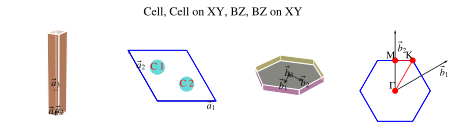

In [ ]:
import matplotlib.pyplot as plt, pivotpy as pp

poscar = pp.POSCAR('POSCAR')
axs = pp.get_axes(ncols=4,figsize=(8,2))
poscar.splot_cell(ax=axs[0],colormap='hot',color='white').set_axis_off()
poscar.splot_cell(ax=axs[1],plane='xy').set_axis_off()
poscar.splot_bz(ax=axs[2],color='white').set_axis_off()
poscar.splot_bz(ax=axs[3],plane='xy').set_axis_off()
# Next commnad plot path on most recent BZ from line above
poscar.splot_kpath(4,[0,2,4],['$\Gamma$','K','M'],color='r',ha='right',va='bottom')
pos = poscar.bring_in_cell(poscar.data.positions)
axs[1].scatter(pos[:,0],pos[:,1],c='c',s=200)
axs[1].add_text(xs=pos[:,0],ys=pos[:,1],txts=poscar.data.labels,transform=False)
_ = plt.gcf().suptitle('Cell, Cell on XY, BZ, BZ on XY')

In [ ]:
#export 
class LOCPOT:
    def __init__(self,path=None,e = True,m = False):
        """
        - Returns Data from LOCPOT and similar structure files like CHG. Loads only single set out of 2/4 magnetization data to avoid performance/memory cost while can load electrostatic and one set of magnetization together.
        - **Parameters**
            - path: path/to/LOCPOT or similar stuructured file like CHG. LOCPOT is auto picked in CWD.
            - e   : Electric potential/charge density. Default is True.
            - m   : Magnetization density m. Default is False. If True, picks `m` for spin polarized case, and `m_x` for non-colinear case. Additionally it can take 'x','y' and 'z' in case of non-colinear calculations.
        - **Exceptions**
            - Would raise index error if magnetization density set is not present in LOCPOT/CHG in case `m` is not False.
        """
        self.path = path # Must be
        self.m = m # Required to put in plots.
        self._data = gu.export_potential(locpot=path, e=e,m=m)

    @property
    def data(self):
        return self._data

    @_sub_doc(sp.plot_potential,'- e_or_m')
    @_sub_doc(sp.plot_potential,'- basis')
    def splot_e(self,operation='mean_z',ax=None,period=None,
                 lr_pos=(0.25,0.75),lr_widths = [0.5,0.5],
                 labels=(r'$V(z)$',r'$\langle V \rangle _{roll}(z)$',r'$\langle V \rangle $'),
                 colors = ((0,0.2,0.7),'b','r'),annotate=True):
        return sp.plot_potential(basis=self._data.basis,e_or_m=self._data.e,operation=operation,
                                    ax=ax,period=period,lr_pos=lr_pos,lr_widths=lr_widths,
                                    labels=labels,colors=colors,annotate=annotate)

    @_sub_doc(sp.plot_potential,'- e_or_m')
    @_sub_doc(sp.plot_potential,'- basis')
    def splot_m(self,operation='mean_z',ax=None,period=None,
                lr_pos = (0.25,0.75),lr_widths = [0.5,0.5],
                labels = (r'$M(z)$',r'$\langle M \rangle _{roll}(z)$',r'$\langle M \rangle $'),
                colors = ((0,0.2,0.7),'b','r'),annotate=True):
        if self.m:
            try:
                e_or_m = self._data.m
            except:
                e_or_m = self._data.to_dict()[f'm_{self.m}']
        else:
            raise ValueError("Magnetization data set does not exist in {}".format(self.path))
        return sp.plot_potential(basis=self._data.basis,e_or_m=e_or_m,operation=operation,
                                    ax=ax,period=period,lr_pos=lr_pos,lr_widths=lr_widths,
                                    labels=labels,colors=colors,annotate=annotate)

    def view_period(self,period_guess=0.25,operation='mean_z',nslice=10,e_or_m=None,):
        """
        - Periodicity check by plotly's interactive plot.
        - **Parameters**
            - period_guess: Initial guess of period. Default is 0.25. Should be in [0,1].
            - operation   : Any of ['mean_x','min_x','max_x','mean_y','min_y','max_y','mean_z','min_z','max_z'].
            - nslice      : Default is 10. Number of periods around and including period_guess. e.g. If you give 0.25 as period_guess and nslice is 10, you will get 10 lines of rolling average over given data from where you can choose best fit or try another guess and so on.
            - e_or_m      : None by default. Not required in most cases as `view_period()` will try to get data itself from top class in order of `self._data.[e,m,m_x,m_y,m_z]` and if `self._data.e` exists it never goes to others, so you can overwrite this by setting `e_or_m = self._data.[your choice]`.
        """
        pos = period_guess
        check = ['mean_x','min_x','max_x','mean_y','min_y','max_y','mean_z','min_z','max_z']
        if operation not in check:
            raise ValueError("operation expects any of {!r}, got {}".format(check,operation))
        if e_or_m is None:
            try:
                data = self._data.e
            except:
                try:
                    data = self._data.m
                except:
                   data = self._data.to_dict()[f'm_{self.m}']
                else:
                    raise ValueError("Magnetization data set does not exist in {}".format(self.path))
        else:
            data = e_or_m

        _opr,_dir = operation.split('_')
        x_ind = 'xyz'.index(_dir)
        other_inds = tuple([i for i in [0,1,2] if i != x_ind])
        _func_ = np.min if _opr == 'min' else np.max if _opr == 'max' else np.mean

        fig = go.Figure()
        _arr = _func_(data,axis = other_inds)
        N = np.rint(pos*len(_arr)).astype(int)
        _range = range(int(N-nslice/2),int(N+nslice/2+1)) # +1 for range.
        for div in _range:
            if div > 0 and div < len(_arr):
                y = np.convolve(_arr+div,np.ones((div,))/div,mode='valid')
                x = np.linspace(0,1,len(y))
                h_text = ["{}: {:>5.3f}</br>v: {:>5.3f}".format(_dir,_h,_v-div) for _h,_v in zip(x,y)]
                fig.add_trace(go.Scatter(x=x,y=y,name="Roll_av({:>5.3f})".format(div/len(_arr)),hovertext=h_text))
        fig.update_layout(title = self._data.SYSTEM,font=dict(family="stix serif",size=14),
                          yaxis = go.layout.YAxis(title_text='No. of Points in Rolling Average'),
                          xaxis = go.layout.XAxis(title_text="{}({}<sub>max</sub>)".format(_dir,_dir)))
        return fig

In [ ]:
#hide_input
_doc_class_memebers(LOCPOT)

<h4 id="LOCPOT.splot_e" class="doc_header"><code>LOCPOT.splot_e</code><a href="__main__.py#L21" class="source_link" style="float:right">[source]</a></h4>

> <code>LOCPOT.splot_e</code>(**`operation`**=*`'mean_z'`*, **`ax`**=*`None`*, **`period`**=*`None`*, **`lr_pos`**=*`(0.25, 0.75)`*, **`lr_widths`**=*`[0.5, 0.5]`*, **`labels`**=*`('$V(z)$', '$\\langle V \\rangle _{roll}(z)$', '$\\langle V \\rangle $')`*, **`colors`**=*`((0, 0.2, 0.7), 'b', 'r')`*, **`annotate`**=*`True`*)

- Returns tuple(ax,Data) where Data contains resultatnt parameters of averaged potential of LOCPOT.
- **Parameters**
    - basis  : `export_potential().basis`.
    - operation: Default is 'mean_z'. What to do with provided volumetric potential data. Anyone of these 'mean_x','min_x','max_x','mean_y','min_y','max_y','mean_z','min_z','max_z'.
    - ax: Matplotlib axes, if not given auto picks.
    - period: Periodicity of potential in fraction between 0 and 1. For example if a slab is made of 4 super cells in z-direction, period=0.25.
    - lr_pos: Locations around which averages are taken.Default (0.25,0.75). Provide in fraction between 0 and 1. Center of period is located at these given fractions. Work only if period is given.
    - lr_widths: Default is [0.5,0.5], you may have slabs which have different lengths on left and right side. Provide a pair proportional to widths e.g (1,1), (1,1.1) etc. and it is auto normalized to 1. Works only if period is given.
    - labels: List of three labels for legend. Use plt.legend() or pp.add_legend() for labels to appear. First entry is data plot, second is its convolution and third is complete average.
    - colors: List of three colors for lines.
    - annotate: True by default, writes difference of right and left averages on plot.

<h4 id="LOCPOT.splot_m" class="doc_header"><code>LOCPOT.splot_m</code><a href="__main__.py#L31" class="source_link" style="float:right">[source]</a></h4>

> <code>LOCPOT.splot_m</code>(**`operation`**=*`'mean_z'`*, **`ax`**=*`None`*, **`period`**=*`None`*, **`lr_pos`**=*`(0.25, 0.75)`*, **`lr_widths`**=*`[0.5, 0.5]`*, **`labels`**=*`('$M(z)$', '$\\langle M \\rangle _{roll}(z)$', '$\\langle M \\rangle $')`*, **`colors`**=*`((0, 0.2, 0.7), 'b', 'r')`*, **`annotate`**=*`True`*)

- Returns tuple(ax,Data) where Data contains resultatnt parameters of averaged potential of LOCPOT.
- **Parameters**
    - basis  : `export_potential().basis`.
    - operation: Default is 'mean_z'. What to do with provided volumetric potential data. Anyone of these 'mean_x','min_x','max_x','mean_y','min_y','max_y','mean_z','min_z','max_z'.
    - ax: Matplotlib axes, if not given auto picks.
    - period: Periodicity of potential in fraction between 0 and 1. For example if a slab is made of 4 super cells in z-direction, period=0.25.
    - lr_pos: Locations around which averages are taken.Default (0.25,0.75). Provide in fraction between 0 and 1. Center of period is located at these given fractions. Work only if period is given.
    - lr_widths: Default is [0.5,0.5], you may have slabs which have different lengths on left and right side. Provide a pair proportional to widths e.g (1,1), (1,1.1) etc. and it is auto normalized to 1. Works only if period is given.
    - labels: List of three labels for legend. Use plt.legend() or pp.add_legend() for labels to appear. First entry is data plot, second is its convolution and third is complete average.
    - colors: List of three colors for lines.
    - annotate: True by default, writes difference of right and left averages on plot.

<h4 id="LOCPOT.view_period" class="doc_header"><code>LOCPOT.view_period</code><a href="__main__.py#L48" class="source_link" style="float:right">[source]</a></h4>

> <code>LOCPOT.view_period</code>(**`period_guess`**=*`0.25`*, **`operation`**=*`'mean_z'`*, **`nslice`**=*`10`*, **`e_or_m`**=*`None`*)

- Periodicity check by plotly's interactive plot.
- **Parameters**
    - period_guess: Initial guess of period. Default is 0.25. Should be in [0,1].
    - operation   : Any of ['mean_x','min_x','max_x','mean_y','min_y','max_y','mean_z','min_z','max_z'].
    - nslice      : Default is 10. Number of periods around and including period_guess. e.g. If you give 0.25 as period_guess and nslice is 10, you will get 10 lines of rolling average over given data from where you can choose best fit or try another guess and so on.
    - e_or_m      : None by default. Not required in most cases as `view_period()` will try to get data itself from top class in order of `self._data.[e,m,m_x,m_y,m_z]` and if `self._data.e` exists it never goes to others, so you can overwrite this by setting `e_or_m = self._data.[your choice]`.

In [ ]:
#export
@_sub_doc(sp.get_axes,'- self',replace={'get_axes':'get_axes'})
def get_axes(figsize=(3.4, 2.6), nrows=1, ncols=1, widths=[], heights=[], axes_off=[], axes_3d=[], sharex=False, sharey=False, azim=45, elev=15, ortho3d=True, **subplots_adjust_kwargs):
    axes = sp.get_axes(figsize=figsize, nrows=nrows, ncols=ncols, widths=widths, heights=heights, axes_off=axes_off, axes_3d=axes_3d, sharex=sharex, sharey=sharey, azim=azim, elev=elev, ortho3d=ortho3d, **subplots_adjust_kwargs)
    for ax in np.array([axes]).flatten():
        for f in [sp.add_text,sp.add_legend,sp.add_colorbar,sp.color_wheel,sp.break_spines,sp.modify_axes,sp.append_axes, sp.join_axes]:
            if ax.name != '3d':
                setattr(ax,f.__name__,f.__get__(ax,type(ax)))
    return axes
get_axes.__doc__ = get_axes.__doc__ + '''
**There are extra methods added to each axes (only 2D) object.**
- add_text
- add_legend
- add_colorbar
- color_wheel
- break_spines
- modify_axes
- append_axes
- join_axes
'''

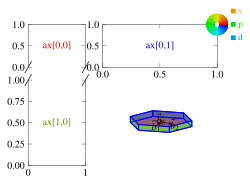

In [ ]:
axs = get_axes(nrows=2,ncols=2,widths=[1,2],heights=[1,2],axes_3d=[(1,1)])
axs[0,0].add_text(0.5,0.5,'ax[0,0]')
axs[0,1].add_text(0.5,0.5,'ax[0,1]',colors='blue')
axs[1,0].add_text(0.5,0.5,'ax[1,0]',colors='olive')
axs[1,0].break_spines(['top'])
axs[0,0].break_spines(['bottom'])
axs[0,1].color_wheel(colormap='RGB')
poscar.splot_bz(axs[1,1],colormap='RGB').set_axis_off()

In [ ]:
#export
class Vasprun:
    """
    - All plotting functions that depend on `export_vasprun` are joined under this class and renamed.

    - **Main Parameter**
        - path: str: path/to/vasprun.xml. Auto picks in CWD.

    - **Optional Parameters** (only useful if path is `vasprun.xml` file)
        - skipk      : int: Skip initial kpoints.
        - elim       : list: Energy range e.g. [-5,5].
        - shift_kpath: float: Shift in kpath values for side by side plotting.
        - try_pwsh   : bool: True by default, tries to load data exported using Powershell's `Vasp2Visual.Export-Vasprun` command.
        - data   : json/pickle file/str or VasprunData Take precedence over path parameter.

    - **Attributes and Methods**
        - data        : Exported data from given file. This has it's own attributes as well to save as json/pickle etc.
        - to_json     : Saves data in `.json` file. Useful for transport to other langauges.
        - to_pickle   : Saves data in `.pickle` file. Useful for fast reload in python.
        - splot_[...] : Plots data using `sp.splot_[...]` functions.
        - iplot_[...] : Plots data using `sp.iplot_[...]` functions.

    > Tip: If KPOINTS file is generated by this module, ticks on kpath are auto-picked.
    """
    def __init__(self,path = None,skipk = None,elim=[],shift_kpath=0,try_pwsh=True,data=None):
        if data: #json/pickle data strings
            self._data = serializer.VasprunData.validated(data, keys=['bands','kpath','poscar','sys_info'])
        else:
            self._data = vp.export_vasprun(path=path,skipk=skipk,elim=elim,shift_kpath=shift_kpath,try_pwsh=try_pwsh)

        self.elim = elim
        self._kpath = self._data.kpath  # For info only, get updated with plot commands
        self._efermi = self._data.bands.E_Fermi   # For info only, get updated with plot commands

        if path == None:
            self.kticks = sio.read_ticks('KPOINTS')
        elif os.path.isfile(path):
            self.kticks = sio.read_ticks(os.path.join(os.path.dirname(path),'KPOINTS'))
        else:
            self.kticks = {} # no kticks available when loading from json/pickle data_str

    @property
    def poscar(self):
        """Returns POSCAR object that can be used for plotting BZ/Lattice etc.

        New in 1.1.5
        """
        return POSCAR(data = self._data.poscar)  #POSCAR class

    def __handle_kwargs(self,kwargs,dos=False):
        kwargs = {'elim': self.elim, **kwargs}
        if dos:
            return kwargs
        ticks = {k:self.kticks[k] for k in ['ktick_inds','ktick_vals','kseg_inds']}
        kwargs = {**ticks,**kwargs} #Prefer provided ones

        # Set for info only in case of bandstructure
        if  'kseg_inds' in kwargs and kwargs['kseg_inds']:
            self._kpath =  vp.join_ksegments(self._data.kpath,kwargs['kseg_inds'])
        if 'E_Fermi' in kwargs and kwargs['E_Fermi'] != None: #None is important to pick 0 as fermi as well
            self._efermi = kwargs['E_Fermi']
        return kwargs

    @_sub_doc(serializer.Dict2Data.to_json,'')
    def to_json(self,outfile=None,indent=1):
        return self._data.to_json(outfile=outfile,indent=indent)

    @_sub_doc(serializer.Dict2Data.to_pickle,'')
    def to_pickle(self,outfile=None):
        return self._data.to_pickle(outfile=outfile)

    @property
    def data(self):
        "Get exported data."
        return self._data

    def select(self,kpoints_inds = None, bands_inds = None, kseg_inds = None):
        """Seletc data based on kpoints and bands indices.
        This is useful to select only a subset of data and even reorder kpoints after calculations.
        Both   `kpoints_inds` and `bands_inds` are based on current data and should be based on zero indexing.
        `kseg_inds` is index of disconnected kpoints in `kpoints_inds`, e.g. in `kpoints_inds = [0,5,6,7]`, if 0 and 5 are disconnected, `kseg_inds = [1]`.

        **Returns** `Vasprun` object with selected data that can be plotted using `splot_[...]` or `iplot_[...]` functions.

        New in version 1.1.4
        """
        if kpoints_inds is None and bands_inds is None:
            return self

        assert isinstance(kpoints_inds,(list,tuple,range)) if kpoints_inds is not None else True
        assert isinstance(bands_inds,(list,tuple,range)) if bands_inds is not None else True

        d = self.data.to_dict()
        kpoints_inds = range(len(d['kpoints'])) if kpoints_inds is None else kpoints_inds
        bands_inds = range(len(d['bands']['indices'])) if bands_inds is None else bands_inds

        d['kpoints'] = d['kpoints'][kpoints_inds]
        d['kpath'] = [0, *np.linalg.norm(d['kpoints'][1:] - d['kpoints'][:-1],axis=1).cumsum().round(6)]
        d['kpath'] = vp.join_ksegments(d['kpath'],kseg_inds) # If broken kpath is provided, join it

        d['bands']['indices'] = tuple([d['bands']['indices'].start + b for b in bands_inds]) # It is range in original data

        if self.data.sys_info.ISPIN == 1:
            d['bands']['evals'] = d['bands']['evals'][kpoints_inds][:,bands_inds]
            d['pro_bands']['pros'] = d['pro_bands']['pros'][:,kpoints_inds][:,:,bands_inds,...]
        else:
            d['bands']['evals']['SpinUp'] = d['bands']['evals']['SpinUp'][kpoints_inds][:,bands_inds]
            d['bands']['evals']['SpinDown'] = d['bands']['evals']['SpinDown'][kpoints_inds][:,bands_inds]
            d['pro_bands']['pros']['SpinUp'] = d['pro_bands']['pros']['SpinUp'][:,kpoints_inds][:,:,bands_inds,...]
            d['pro_bands']['pros']['SpinDown'] = d['pro_bands']['pros']['SpinDown'][:,kpoints_inds][:,:,bands_inds,...]

        return self.__class__(data_str = serializer.VasprunData(d).to_json())


    @_sub_doc(sp.splot_bands,'- path_evr')
    def splot_bands(self,ax = None,**kwargs):
        kwargs = self.__handle_kwargs(kwargs)
        return sp.splot_bands(self._data,ax = ax, **kwargs)

    @_sub_doc(sp.splot_dos_lines,'- path_evr')
    def splot_dos_lines(self,elements = [[0],], orbs = [[0],], labels = ['s',], ax = None, query_data= {}, **kwargs):
        kwargs = self.__handle_kwargs(kwargs,dos=True)
        return sp.splot_dos_lines(self._data,elements = elements, orbs = orbs, labels = labels, ax = ax, query_data = query_data,**kwargs)

    @_sub_doc(sp.splot_rgb_lines,'- path_evr')
    def splot_rgb_lines(self,elements = [[],[],[]], orbs = [[],[],[]], labels = ['','',''], ax = None, query_data= {}, **kwargs):
        kwargs = self.__handle_kwargs(kwargs)
        return sp.splot_rgb_lines(self._data,elements = elements, orbs = orbs, labels = labels, ax = ax, query_data = query_data,**kwargs)

    @_sub_doc(sp.splot_color_lines,'- path_evr')
    def splot_color_lines(self,elements = [[0],], orbs = [[0],], labels = ['s',],axes = None, query_data= {}, **kwargs):
        kwargs = self.__handle_kwargs(kwargs)
        return sp.splot_color_lines(self._data,elements = elements, orbs = orbs, labels = labels, axes = axes, query_data = query_data,**kwargs)

    @_sub_doc(ip.iplot_dos_lines,'- path_evr')
    def iplot_dos_lines(self,elements = [[0],], orbs = [[0],], labels = ['s',], query_data= {}, **kwargs):
        kwargs = self.__handle_kwargs(kwargs, dos=True)
        return ip.iplot_dos_lines(self._data,elements = elements, orbs = orbs, labels = labels, query_data = query_data,**kwargs)

    @_sub_doc(ip.iplot_rgb_lines,'- path_evr')
    def iplot_rgb_lines(self,elements = [[],[],[]], orbs = [[],[],[]], labels = ['','',''], query_data= {}, **kwargs):
        kwargs = self.__handle_kwargs(kwargs)
        return ip.iplot_rgb_lines(self._data,elements = elements, orbs = orbs, labels = labels, query_data = query_data,**kwargs)

    def get_band_info(self,b_i,k_i=None):
        """Get band information for given band index `b_i`. If `k_i` is given, returns info at that point
        Fermi energy is subtracted from all energies. When a plot commnad is called, the Fermi energy is updated if provided.
        """
        def at_minmax(_bands,_pros,func,k_i=None):
            _bands_ = _bands.flatten() - self._efermi # subtract fermi energy
            if isinstance(k_i,int):
                extrema = _bands_[k_i]
                k = float(self._kpath[k_i])
                kp = self._data.kpoints[k_i]
                pros = _pros[:,k_i,:].sum(axis=0).flatten()
            else:
                extrema = func(_bands_)
                where, = np.where(_bands_ == extrema) # unpack singelton
                k, kp = [float(self._kpath[w]) for w in where], self._data.kpoints[where]
                pros = _pros[:,where[0],:].sum(axis=0).flatten()
            return serializer.Dict2Data({'e':float(extrema),'k':k,'kp':kp.tolist(),
                    'pros':{l.replace('-',''):float(p) for p,l in zip(pros,self._data.pro_bands.labels)}})

        if self._data.bands.ISPIN == 1:
            b = self._data.bands.evals[:,b_i]
            p = self._data.pro_bands.pros[:,:,b_i,:]

            if isinstance(k_i,int): # single kpoint
                return at_minmax(b,p,np.min,k_i=k_i)

            return serializer.Dict2Data({'min':at_minmax(b,p,np.min,k_i=k_i),'max':at_minmax(b,p,np.max,k_i=k_i)})

        else: # spin-polarized
            bu = self._data.bands.evals.SpinUp[:,b_i]
            pu = self._data.pro_bands.pros.SpinUp[:,:,b_i,:]

            _minu = at_minmax(bu,pu,np.min,k_i=k_i)
            _maxu = at_minmax(bu,pu,np.max,k_i=k_i)

            bd = self._data.bands.evals.SpinDown[:,b_i]
            pd = self._data.pro_bands.pros.SpinDown[:,:,b_i,:]

            _mind = at_minmax(bd,pd,np.min,k_i=k_i)
            _maxd = at_minmax(bd,pd,np.max,k_i=k_i)

            if isinstance(k_i,int): # single kpoint
                return serializer.Dict2Data({'SpinUp':_minu,'SpinDown':_mind})

            return serializer.Dict2Data({'SpinUp':{'min':_minu,'max':_maxu},'SpinDown':{'min':_mind,'max':_maxd}})

    def get_en_diff(self,b1_i,b2_i,k1_i=None,k2_i=None):
        """Get energy difference between two bands at given two kpoints indices. Index 2 is considered at higher energy.
        - b1_i, b2_i : band indices of the two bands, minimum energy difference is calculated.
        - k1_i, k2_i : k-point indices of the two bands.

        > If k1_i and k2_i are not provided, `min(b2_i) - max(b1_i)` is calculated which is equivalent to band gap.

        Returns: Data with follwoing attributes which can be used to annotate the difference on plot.
            de     : energy difference
            coords : np.array([[k1,e1],[k2,e2]]) #E_Fermi is subtracted either from system or when user provides in a plot command.
            eqv_coords: list(coords) at equivalent k-points if exit. Do not appear if k1_i and k2_i are provided.

        For spin-polarized case, 4 blocks of above data are returned which are accessible by
        `u1u2, u1d2, d1u2, d1d2` and they collects energy difference between 2 given bands at 2 different spin.

        """
        if k1_i and k2_i == None:
            raise ValueError('When you provide `k1_i`, `k2_i` cannot be None. They both can be None at same time.')
        if k1_i == None and k2_i:
            raise ValueError('When you provide `k2_i`, `k1_i` cannot be None. They both can be None at same time.')

        def format_coords(b1_max,b2_min):
            "maximum of b1 and min of b2 is taken for energy difference of two bands when kpoint not given."
            combs = []
            for k1 in b1_max.k:
                for k2 in b2_min.k:
                    combs.append(np.array([[k1,b1_max.e],[k2,b2_min.e]]))

            _out = {'coords':combs[0]}
            if combs[1:]:
                _out['eqv_coords'] = combs[1:]
            return _out

        if self._data.bands.ISPIN == 1:
            if isinstance(k1_i,int):
                b1 = self.get_band_info(b1_i,k_i=k1_i)
                b2 = self.get_band_info(b2_i,k_i=k2_i)
                return serializer.Dict2Data({'de':b2.e - b1.e, 'coords': np.array([[b1.k,b1.e],[b2.k, b2.e]])})
            else:
                b1 = self.get_band_info(b1_i,k_i=None).max
                b2 = self.get_band_info(b2_i,k_i=None).min

                return serializer.Dict2Data({'de':b2.e - b1.e, **format_coords(b1,b2)})
        else:
            if isinstance(k1_i,int):
                b1u = self.get_band_info(b1_i,k_i=k1_i).SpinUp
                b1d = self.get_band_info(b1_i,k_i=k1_i).SpinDown
                b2u = self.get_band_info(b2_i,k_i=k2_i).SpinUp
                b2d = self.get_band_info(b2_i,k_i=k2_i).SpinDown

                return serializer.Dict2Data({
                    'u1u2':{'de':b2u.e - b1u.e, 'coords':np.array([[b1u.k, b1u.e], [b2u.k, b2u.e]])},
                    'd1d2':{'de':b2d.e - b1d.e, 'coords':np.array([[b1d.k, b1d.e], [b2d.k, b2d.e]])},
                    'd1u2':{'de':b2u.e - b1d.e, 'coords':np.array([[b1d.k, b1d.e], [b2u.k, b2u.e]])},
                    'u1d2':{'de':b2d.e - b1u.e, 'coords':np.array([[b1u.k, b1u.e], [b2d.k, b2d.e]])}
                })
            else:
                b1u = self.get_band_info(b1_i,k_i=None).SpinUp.max # max in lower band
                b1d = self.get_band_info(b1_i,k_i=None).SpinDown.max
                b2u = self.get_band_info(b2_i,k_i=None).SpinUp.min # min in upper band
                b2d = self.get_band_info(b2_i,k_i=None).SpinDown.min

                return serializer.Dict2Data({
                    'u1u2':{'de':b2u.e - b1u.e, **format_coords(b1u,b2u)},
                    'd1d2':{'de':b2d.e - b1d.e, **format_coords(b1d,b2d)},
                    'd1u2':{'de':b2u.e - b1d.e, **format_coords(b1d,b2u)},
                    'u1d2':{'de':b2d.e - b1u.e, **format_coords(b1u,b2d)}
                })

    def splot_en_diff(self, coords, ax, **kwargs):
        """Plot energy difference at given ax. Provide `coords` from output of `get_en_diff().coords` or `get_en_diff().eqv_coords[i]` if exist.
        Provide `ax` on which bandstructure is plotted.
        E_Fermi is already subtracted in `coords` from system or by user input when bandstructure plot commands are run.
        kwargs are passed to `ax.step`.
        Returns ax.
        """
        kwargs = {'marker':'.',**kwargs}
        kwargs['where'] = 'mid' # override this
        coords = np.array(coords) # make sure it is np.array
        ax.step(*coords.T,**kwargs)
        return ax

In [ ]:
#hide_input
_doc_class_memebers(Vasprun)

<h4 id="Vasprun.to_json" class="doc_header"><code>Vasprun.to_json</code><a href="__main__.py#L64" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.to_json</code>(**`outfile`**=*`None`*, **`indent`**=*`1`*)



<h4 id="Vasprun.to_pickle" class="doc_header"><code>Vasprun.to_pickle</code><a href="__main__.py#L68" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.to_pickle</code>(**`outfile`**=*`None`*)



<h4 id="Vasprun.select" class="doc_header"><code>Vasprun.select</code><a href="__main__.py#L77" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.select</code>(**`kpoints_inds`**=*`None`*, **`bands_inds`**=*`None`*, **`kseg_inds`**=*`None`*)

Seletc data based on kpoints and bands indices.
This is useful to select only a subset of data and even reorder kpoints after calculations.
Both   `kpoints_inds` and `bands_inds` are based on current data and should be based on zero indexing.
`kseg_inds` is index of disconnected kpoints in `kpoints_inds`, e.g. in `kpoints_inds = [0,5,6,7]`, if 0 and 5 are disconnected, `kseg_inds = [1]`.

**Returns** [`Vasprun`](/pivotpy/MainAPI.html#Vasprun) object with selected data that can be plotted using `splot_[...]` or `iplot_[...]` functions.

New in version 1.1.4

<h4 id="Vasprun.splot_bands" class="doc_header"><code>Vasprun.splot_bands</code><a href="__main__.py#L115" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.splot_bands</code>(**`ax`**=*`None`*, **\*\*`kwargs`**)

- Returns axes object and plot on which all matplotlib allowed actions could be performed.
- **Parameters**
    - ax         : Matplotlib axes object, if not given, one is created.
    - skipk      : Number of kpoints to skip, default will be from IBZKPT.
    - kseg_inds : Points where kpath is broken.
    - elim       : [min,max] of energy range.
    - E_Fermi    : If not given, automatically picked from [`export_vasprun`](/pivotpy/XmlElementTree.html#export_vasprun).
    - ktick_inds : High symmetry kpoints indices.abs
    - ktick_vals  : High Symmetry kpoints labels.
    - txt,xytxt and ctxt are extra arguments for text on figure.
    - interp_nk   : Dictionary with keys 'n' and 'k' for interpolation.

Additional kwargs are passed to matplotlib.lines.Lin2D. For passing a keyword to spindown channel, append an underscore, e.g 'lw' goes to SpinUp and 'lw_' goes to SpinDown.
- **Returns**
    - ax : matplotlib axes object with plotted bands.

<h4 id="Vasprun.splot_dos_lines" class="doc_header"><code>Vasprun.splot_dos_lines</code><a href="__main__.py#L120" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.splot_dos_lines</code>(**`elements`**=*`[[0]]`*, **`orbs`**=*`[[0]]`*, **`labels`**=*`['s']`*, **`ax`**=*`None`*, **`query_data`**=*`{}`*, **\*\*`kwargs`**)

- Returns ax object (if ax!=False) and plot on which all matplotlib allowed actions could be performed, returns lists of energy,tdos and pdos and labels. If given,elements,orbs colors, and labels must have same length. If not given, zeroth ions is plotted with s-orbital.
- **Parameters**)
    - elements   : List [[0],], by defualt and plot first ion's projections.
    - orbs       : List [[0],] lists of indices of orbitals, could be empty.
    - labels     : List [str,] of orbitals labels. len(labels)==len(orbs) must hold.  Auto adds `↑`,`↓` for ISPIN=2.
    - ax         : Matplotlib axes object, if None, one is created. If False, data lists are returned.
    - include_dos: One of {'both','tdos','pdos'}.
    - elim       : [min,max] of energy range.
    - E_Fermi    : If not given, automatically picked from [`export_vasprun`](/pivotpy/XmlElementTree.html#export_vasprun).
    - colormap  : Matplotlib's standard color maps. Default is 'gist_ranibow'. Use 'RGB' if want to compare with [`splot_rgb_lines`](/pivotpy/StaticPlots.html#splot_rgb_lines) with 3 projection inputs (len(orbs)==3).
    - fill_area  : Default is True and plots filled area for dos. If False, plots lines only.
    - vertical   : False, If True, plots along y-axis.
    - showlegend : True by defualt.
    - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
    - interp_nk   : Dictionary with keys 'n' and 'k' for interpolation.
    - legend_kwargs: Dictionary to contain legend arguments to fix.
    - query_data : Dictionary with keys as label and values as list of length 2. If given, used in place of elements, orbs and labels arguments.
                Example: {'s':([0,1],[0]),'p':([0,1],[1,2,3]),'d':([0,1],[4,5,6,7,8])} will pick up s,p,d orbitals of first two ions of system.
- **Returns**
    - ax         : Matplotlib axes.

<h4 id="Vasprun.splot_rgb_lines" class="doc_header"><code>Vasprun.splot_rgb_lines</code><a href="__main__.py#L125" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.splot_rgb_lines</code>(**`elements`**=*`[[], [], []]`*, **`orbs`**=*`[[], [], []]`*, **`labels`**=*`['', '', '']`*, **`ax`**=*`None`*, **`query_data`**=*`{}`*, **\*\*`kwargs`**)

- Returns axes object and plot on which all matplotlib allowed actions could be performed. In this function,orbs,labels,elements all have list of length 3. Inside list, sublists or strings could be any length but should be there even if empty.
- **Parameters**
    - elements   : List [[],[],[]] by default and plots s,p,d orbital of system..
    - orbs       : List [[r],[g],[b]] of indices of orbitals, could be empty, but shape should be same.
    - labels     : List [str,str,str] of projection labels. empty string should exist to maintain shape. Auto adds `↑`,`↓` for ISPIN=2. If a label is empty i.e. '', it will not show up in colorbar ticks or legend.
    - ax         : Matplotlib axes object, if not given, one is created.
    - skipk      : Number of kpoints to skip, default will be from IBZKPT.
    - kseg_inds : Points where kpath is broken.
    - elim       : [min,max] of energy range.
    - E_Fermi    : If not given, automatically picked from [`export_vasprun`](/pivotpy/XmlElementTree.html#export_vasprun).
    - ktick_inds : High symmetry kpoints indices.abs
    - ktick_vals  : High Symmetry kpoints labels.
    - max_width  : Width to scale whole projections. if `uni_width=True, width=max_width/2`. Default is None and linewidth at any point = 2.5*sum(ions+orbitals projection of all three input at that point). Linewidth is scaled to max_width if an int or float is given.
    - txt        : Text on figure, if None, SYSTEM's name is printed.
    - xytxt      : [x_coord,y_coord] of text relative to axes.
    - ctxt       : color of text.
    - uni_width  : If True, width of bands kept uniform.
    - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
    - interp_nk  : Dictionary with keys 'n' and 'k' for interpolation.
    - scale_color: Boolean. Default True, colors are scaled to 1 at each point. If False, clips colors in range [0,1] but does not effect linewidth.
    - scale_data : Default is True and normalizes projection data to 1. Has no visual effect if scale_color = True too.
    - colorbar   : Default is True. Displays a vertical RGB colorbar.
    - color_matrix: Only works if `scale_color==True`. 3x3 or 3x4 numpy array or list to transform from RGB to another space,provided that sum(color_matrix[i,:3]) <= 1.
                    4th column, if given can be used to control the saturation,contrast and brightness as s,c,b = color_matrix[:,3]
                    For simply changing the color intensity use np.diag([r,g,b]) with r,g,b interval in [0,1].
                    Try `pivotpy.color_matrix` as suggested color matrix and modify, which at s=0 returns gray scale.!
    - query_data : Dictionary with keys as label and values as list of length 2. Should be <= 3 for RGB plots. If given, used in place of elements, orbs and labels arguments.
                    Example: {'s':([0,1],[0]),'p':([0,1],[1,2,3]),'d':([0,1],[4,5,6,7,8])} will pick up s,p,d orbitals of first two ions of system.
- **Returns**
    - ax : matplotlib axes object with plotted projected bands.
    - Registers as colormap `RGB_m` to use in DOS to plot in same colors and `RGB_f` to display bands colorbar on another axes.
> Note: Two figures made by this function could be comapred quantitatively only if `scale_data=False, max_width=None, scale_color=False` as these parameters act internally on data.

<h4 id="Vasprun.splot_color_lines" class="doc_header"><code>Vasprun.splot_color_lines</code><a href="__main__.py#L130" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.splot_color_lines</code>(**`elements`**=*`[[0]]`*, **`orbs`**=*`[[0]]`*, **`labels`**=*`['s']`*, **`axes`**=*`None`*, **`query_data`**=*`{}`*, **\*\*`kwargs`**)

- Returns axes object and plot on which all matplotlib allowed actions could be performed. If given, elements, orbs, and labels must have same length. If not given, zeroth ion is plotted with s-orbital.
- **Parameters**
    - elements   : List [[0],], by defualt and plot first ion's projections.
    - orbs       : List [[0],] lists of indices of orbitals, could be empty.
    - labels     : List [str,] of orbitals labels. len(labels)==len(orbs) must hold.  Auto adds `↑`,`↓` for ISPIN=2. If a label is empty i.e. '', it will not show up in legend.
    - axes       : Matplotlib axes object with one or many axes, if not given, auto created.
    - skipk      : Number of kpoints to skip, default will be from IBZKPT.
    - kseg_inds : Points where kpath is broken.
    - elim       : [min,max] of energy range.
    - E_Fermi    : If not given, automatically picked from [`export_vasprun`](/pivotpy/XmlElementTree.html#export_vasprun).
    - ktick_inds : High symmetry kpoints indices.abs
    - ktick_vals  : High Symmetry kpoints labels.
    - colormap  : Matplotlib's standard color maps. Default is 'gist_ranibow'.
    - showlegend : True by defualt and displays legend relative to axes[0]. If False, it writes text on individual ax.
    - scale_data : Default is False, If True, normalize projection data to 1.
    - max_width  : Width to scale whole projections. Default is None and linewidth at any point on a line = 2.5*sum(ions+orbitals projection of the input for that line at that point). Linewidth is scaled to max_width if an int or float is given.
    - xytxt      : [x_coord,y_coord] of labels relative to axes. Works if showlegend = False.
    - ctxt       : color of text of labels
    - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
    - interp_nk   : Dictionary with keys 'n' and 'k' for interpolation.
    - legend_kwargs: Dictionary containing legend arguments.
    - query_data : Dictionary with keys as label and values as list of length 2. If given, used in place of elements, orbs and labels arguments.
                    Example: {'s':([0,1],[0]),'p':([0,1],[1,2,3]),'d':([0,1],[4,5,6,7,8])} will pick up s,p,d orbitals of first two ions of system.
    - **subplots_adjust_kwargs : plt.subplots_adjust parameters.
- **Returns**
    - axes : matplotlib axes object [one or list of axes] with plotted projected bands.
> Note: Two figures made by this function could be comapred quantitatively only if `scale_data=False, max_width=None` as these parameters act internally on data.

<h4 id="Vasprun.iplot_dos_lines" class="doc_header"><code>Vasprun.iplot_dos_lines</code><a href="__main__.py#L135" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.iplot_dos_lines</code>(**`elements`**=*`[[0]]`*, **`orbs`**=*`[[0]]`*, **`labels`**=*`['s']`*, **`query_data`**=*`{}`*, **\*\*`kwargs`**)

- Returns plotly's figure. If given,elements,orbs colors, and labels must have same length. If not given, zeroth ions is plotted with s-orbital.
- **Parameters**)
    - elements   : List [[0,],] of ions indices, by defualt plot first ion's projections.
    - orbs       : List [[0,],] lists of indices of orbitals, could be empty.
    - labels     : List [str,] of orbitals labels. len(labels) == len(orbs) must hold.
    - elim       : [min,max] of energy range.
    - E_Fermi    : If not given, automatically picked from [`export_vasprun`](/pivotpy/XmlElementTree.html#export_vasprun).
    - colormap  : Matplotlib's standard color maps. Default is 'gist_ranibow'. Use 'RGB' if want to compare with [`iplot_rgb_lines`](/pivotpy/InteractivePlots.html#iplot_rgb_lines) with 3 projection inputs (len(orbs)==3).
    - fill_area  : Default is True and plots filled area for dos. If False, plots lines only.
    - vertical   : False, If True, plots along y-axis.
    - interp_nk   : Dictionary with keys 'n' and 'k' for interpolation.
    - figsize   : Tuple(width,height) in pixels, e.g. (700,400).
    - query_data : Dictionary with keys as label and values as list of length 2. If given, used in place of elements, orbs and labels arguments.
                Example: {'s':([0,1],[0]),'p':([0,1],[1,2,3]),'d':([0,1],[4,5,6,7,8])} will pick up s,p,d orbitals of first two ions of system.
- **Returns**
    - fig        : Plotly's figure object.

<h4 id="Vasprun.iplot_rgb_lines" class="doc_header"><code>Vasprun.iplot_rgb_lines</code><a href="__main__.py#L140" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.iplot_rgb_lines</code>(**`elements`**=*`[[], [], []]`*, **`orbs`**=*`[[], [], []]`*, **`labels`**=*`['', '', '']`*, **`query_data`**=*`{}`*, **\*\*`kwargs`**)

- Returns plotly's figure object, takes care of spin-polarized calculations automatically. `elements`,`orbs` and `labels` are required to be one-to-one lists of size 3 where each item in list could be another list or integer.
- **Parameters**
    - elements   : List of size 3 of list of indices of ions. If not given, picks all ions for each orbital.
    - orbs       : List of size 3 of list of orbital indices, if not gievn, s,p,d plotted.
    - labels  : List of labels for projection.
    - mode       : Three plotting modes are available:
        - 'markers' : Plot whole data as a single scatter object. Its too fast.
        - 'bands'   : Plot data such that each band is accessible via legend.
        - 'lines'   : A replica of `matplotlib LineCollection` object. It plots at each point separately, slower than other two modes.

    - interp_nk   : Dictionary with keys 'n' and 'k' for interpolation.
    - figsize   : Tuple(width,height) in pixels, e.g. (700,400).
    - query_data : Dictionary with keys as label and values as list of length 2. len(query_data) <=3 should hold for RGB plots. If given, used in place of elements, orbs and labels arguments.
                    Example: {'s':([0,1],[0]),'p':([0,1],[1,2,3]),'d':([0,1],[4,5,6,7,8])} will pick up s,p,d orbitals of first two ions of system.
    - **Other Parameters**
        - ktick_inds, ktick_vals,elim,kseg_inds,max_width,title etc.

<h4 id="Vasprun.get_band_info" class="doc_header"><code>Vasprun.get_band_info</code><a href="__main__.py#L145" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.get_band_info</code>(**`b_i`**, **`k_i`**=*`None`*)

Get band information for given band index `b_i`. If `k_i` is given, returns info at that point
Fermi energy is subtracted from all energies. When a plot commnad is called, the Fermi energy is updated if provided.

<h4 id="Vasprun.get_en_diff" class="doc_header"><code>Vasprun.get_en_diff</code><a href="__main__.py#L191" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.get_en_diff</code>(**`b1_i`**, **`b2_i`**, **`k1_i`**=*`None`*, **`k2_i`**=*`None`*)

Get energy difference between two bands at given two kpoints indices. Index 2 is considered at higher energy.
- b1_i, b2_i : band indices of the two bands, minimum energy difference is calculated.
- k1_i, k2_i : k-point indices of the two bands.

> If k1_i and k2_i are not provided, `min(b2_i) - max(b1_i)` is calculated which is equivalent to band gap.

Returns: Data with follwoing attributes which can be used to annotate the difference on plot.
    de     : energy difference
    coords : np.array([[k1,e1],[k2,e2]]) #E_Fermi is subtracted either from system or when user provides in a plot command.
    eqv_coords: list(coords) at equivalent k-points if exit. Do not appear if k1_i and k2_i are provided.

For spin-polarized case, 4 blocks of above data are returned which are accessible by
`u1u2, u1d2, d1u2, d1d2` and they collects energy difference between 2 given bands at 2 different spin.

<h4 id="Vasprun.splot_en_diff" class="doc_header"><code>Vasprun.splot_en_diff</code><a href="__main__.py#L260" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.splot_en_diff</code>(**`coords`**, **`ax`**, **\*\*`kwargs`**)

Plot energy difference at given ax. Provide `coords` from output of `get_en_diff().coords` or `get_en_diff().eqv_coords[i]` if exist.
Provide `ax` on which bandstructure is plotted.
E_Fermi is already subtracted in `coords` from system or by user input when bandstructure plot commands are run.
kwargs are passed to `ax.step`.
Returns ax.

# Examples
Use `Vasprun` class to plot all related figures.

In [ ]:
from pivotpy import Vasprun, iplot2html, color_matrix
vr = Vasprun(path='../graphene_example/ISPIN_1/bands/vasprun.xml',try_pwsh=False)

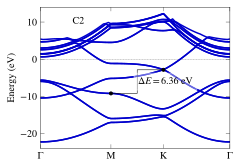

In [ ]:
ax = vr.splot_bands(E_Fermi=0)
delta = vr.get_en_diff(4,6,30,60)
#ax.annotate('',xy=delta.coords[0],xytext=delta.coords[1], arrowprops=dict(arrowstyle='<->',color='g'))
vr.splot_en_diff(delta.coords, ax, color='k',lw=0.5)
ax.add_text(delta.coords[:,0].mean() + 0.2, delta.coords[:,1].mean(), f'$ΔE = {np.round(delta.de,2)}$ eV', colors = 'k',transform=False)

<AxesSubplot:>

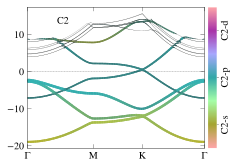

In [ ]:
vr.splot_rgb_lines(color_matrix=color_matrix,scale_color=True)

In [ ]:
iplot2html(vr.iplot_rgb_lines(),modebar=False) #iplot2html is required to show in docs properly

Text(-10, 3, 'Peak to talk about')

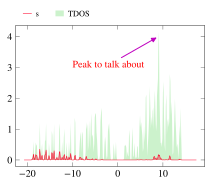

In [ ]:
ax1 = vr.splot_dos_lines()
# You can annotate special points using `ax.annotate`
ax1.annotate('Peak to talk about',xy=(9,4),xytext=(-10,3), color='r',arrowprops=dict(arrowstyle='-|>',color='m'))

# A Mininmal Example of SpinDataFrame
First see an example of  `SpinDataFrame.splot`, later you can manipulate and plot data yourself as given after that.

In [ ]:
import pivotpy as pp
df = pp.SpinDataFrame(r'E:\Research\graphene_example\ISPIN_2\dos\sigm0_01\vasprun.xml',
                   band=3,elements=[[0],[1]], orbs= [(0,1),(1,2,3)],scale_data=True)
df.describe()

 Found ISPIN = 2, output data got attributes spins.<u,d> instead of spins.<s,x,y,z>


,kx,ky,kz,eu,ed,su_0,sd_0,su_1,sd_1
count,840.000000,840.000000,840.0,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,0.006098,0.250000,0.0,-3.351580,-3.351579,0.133251,0.133251,0.686662,0.686661
std,0.288783,0.144424,0.0,1.295273,1.295274,0.272950,0.272950,0.167976,0.167977
min,-0.487805,0.000000,0.0,-5.554938,-5.554938,0.000000,0.000000,0.541748,0.541748
25%,-0.243902,0.121951,0.0,-4.440363,-4.440363,0.000000,0.000000,0.568689,0.568689
50%,0.012195,0.243902,0.0,-3.455538,-3.455538,0.000000,0.000000,0.603641,0.603641
75%,0.250000,0.365854,0.0,-2.307038,-2.307038,0.008495,0.008495,0.912318,0.912318
max,0.487805,0.487805,0.0,-0.019438,-0.019438,0.990049,0.990049,1.000000,1.000000


Text(0, 0.5, '$S_\\uparrow(C_1-p)$')

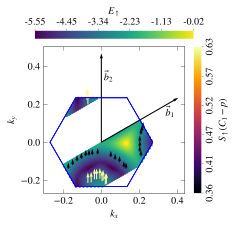

In [ ]:
(ax1,_),(ax2,ax3) = pp.get_axes((3,3),ncols=2,nrows=2,widths=[20,1],heights=[1,18],axes_off=[(0,1)],hspace=0.1,wspace=0.0)
df2 = df.masked('eu',-3.4,0.1,n=70)
df.splot('kx','ky','eu',s=5,ax=ax2)
ax2.colobar(ax1,vertical=False)
df2.splot('kx','ky','eu','su_1',arrows=['','su_1','su_1'],quiver_kws = dict(cmap='inferno'),ax=ax2)
cax2 = ax2.colobar(ax3)
df2.poscar.splot_bz(plane='xy',ax=ax2)
ax1.xaxis.set_label_position("top")
ax1.set_xlabel('$E_\\uparrow $')
ax3.yaxis.set_label_position("right")
ax3.set_ylabel('$S_\\uparrow(C_1-p)$')

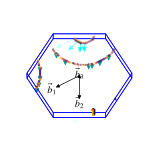

In [ ]:
import numpy as np 
ax3d = pp.get_axes(axes_3d=True)
KPTS = df2.poscar.bring_in_bz(df2[['kx','ky','kz']].to_numpy())
KPTS[:,2] = 0
ax3d.scatter(*KPTS.T,c = df2['eu'],s=2,cmap='inferno')
df2.poscar.splot_bz(ax=ax3d,fill=False)

UVW = df2[['su_0','sd_1','su_1']].to_numpy()
pp.fancy_quiver3d(*KPTS[::8].T,*UVW[::8].T/5,C = np.abs(UVW)[::8]/UVW.max(),arrowstyle='-|>',ax=ax3d)
ax3d.set_axis_off()
ax3d.view_init(elev=60,azim=90)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_scatter3d(x = KPTS[:,0],y = KPTS[:,1], z = KPTS[:,2],marker =dict(color= np.abs(UVW)/UVW.max(),size=2),mode='markers')
df2.poscar.iplot_bz(fig=fig)
fig.add_cone(x = KPTS[::8,0],y = KPTS[::8,1], z = KPTS[::8,2],u = UVW[::8,0],v = UVW[::8,1], w = UVW[::8,2],sizemode='absolute',sizeref=50,colorscale='magma',showscale=False)
pp.iplot2html(fig)

In [ ]:
#hide_input
from pivotpy.utils import nav_links 
nav_links(7)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
> [&nbsp;`▶` MainAPI●&nbsp;](https://massgh.github.io/pivotpy/MainAPI)  
> [&nbsp;`▶` SpinProjectedSurfaces&nbsp;](https://massgh.github.io/pivotpy/SpinProjectedSurfaces)  
> [&nbsp;`▶` Example&nbsp;](https://massgh.github.io/pivotpy/Example)  
